 # Participation Distribution in Committee Selection

 ### Executive Summary

 In the following computer experiments, we aim to understand the
 distribution of selections in a committee when varying sizes of the
 participant pool of SPOs and the committee. We show that the
 "pigeonhole principle" helps us interpret the results and understand
 the finite distribution of the committee seats assigned to participants
 as a function of stake, group, and committee sizes.

 The experiment is designed to:
 - Sample without replacement a group of participants from the population
   and
 - Calculate the stake weight for each participant, which is the stake
   normalized over the group to sum to 1.
 - Assign a committee of the fixed group size based on the stake weight
   of each using random selection with replacement.
 - Analyze the relationship and distribution of committee selection with
   group size.

 We conducted the experiments with varying sizes (100, 200, ..., 500) of
 groups and committees. The results are visualized through plots of
 committee assignments where we vary the group size to see how the
 committee selection and seat count changes.

 The results show that some group members with smaller stake weights may
 not (ever?) get selected for committee seats. With repeated trials where
 a new committee is selected, called an *epoch*, and assuming nonzero
 stake weight, there is nonzero probability of selecting *any* participant
 in the long run. However, in the short term, there is a significant chance
 that some participants will not ever get selected, almost surely. This is
 a natural outcome of the selection process with a discrete and finite
 number of seats. This is a manifestation of this committee selection
 process as it currently stands.


In [ ]:
# %%

# Load the required libraries

from participation_lib import (
    np,
    pd,
    plt,
    sns,
    load_data,
    get_stake_distribution,
    assign_commitee_plus,
    simulate,
    std_error,
    plot_group_to_committee_index,
    plot_selection_count_vs_stake,
    plot_committee_selection_counts,
    plot_committee_selection_seat_cutoff,
)

In [ ]:
# %%

# Load the Data: The population of registered SPOs

population = load_data("../data/pooltool-cleaned.csv")

print(population.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             3056 non-null   object 
 1   stake          3056 non-null   int64  
 2   stake_percent  3056 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 71.8+ KB
None


In [ ]:
# %%

population.describe()

stake  stake_percent
count  3.056000e+03    3056.000000
mean   7.305314e+06       0.032723
std    1.648449e+07       0.073839
min    0.000000e+00       0.000000
25%    5.265000e+02       0.000002
50%    5.692500e+04       0.000255
75%    3.282500e+06       0.014703
max    1.054300e+08       0.472250

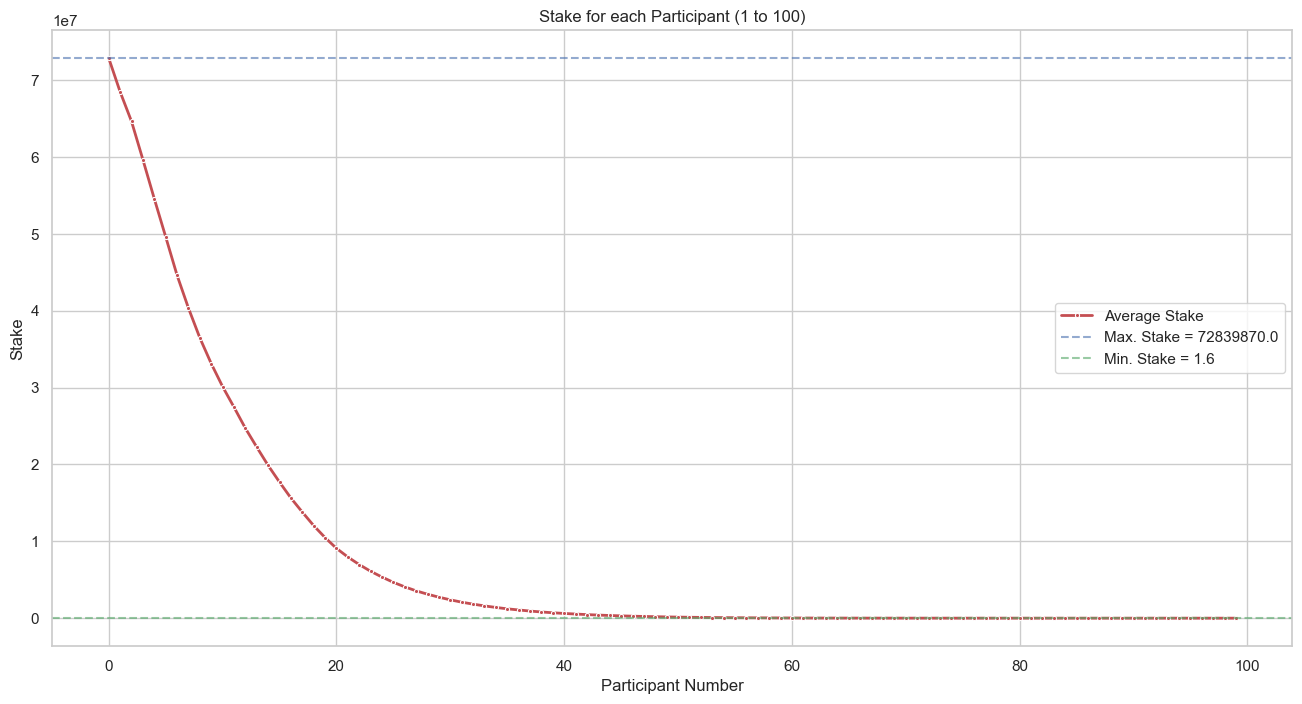

           stake  stake_weight
0   7.283987e+07  9.217518e-02
1   6.846427e+07  8.663808e-02
2   6.461900e+07  8.177208e-02
3   5.964222e+07  7.547422e-02
4   5.455957e+07  6.904238e-02
..           ...           ...
95  1.986700e+01  2.514069e-08
96  1.168200e+01  1.478298e-08
97  6.484000e+00  8.205175e-09
98  3.224000e+00  4.079809e-09
99  1.600000e+00  2.024719e-09

[100 rows x 2 columns]


In [ ]:
# %%

# Let's now sample a group of participants from the population
# and calculate the stake weight for each participant.

group_size = 100

group_stakes = get_stake_distribution(
    population,
    group_size=group_size,
    num_iter=1000,
    plot_it=True,
)
print(group_stakes)

In [ ]:
# %%

print(group_stakes.describe())

              stake  stake_weight
count  1.000000e+02  1.000000e+02
mean   7.902330e+06  1.000000e-02
std    1.665953e+07  2.108180e-02
min    1.600000e+00  2.024719e-09
25%    1.837206e+03  2.324892e-06
50%    1.513475e+05  1.915227e-04
75%    4.831149e+06  6.113575e-03
max    7.283987e+07  9.217518e-02


In [ ]:
# %%

# Let's now assign a committee of the fixed group_size
# based on the stake weight of each

results = assign_commitee_plus(
    group_stakes,
    committee_size=group_size,
    num_iter=1000,
)

In [ ]:
# %%

# Let's now create a plots of committee assignments where we vary
# the group size over {100, 200, 300, 400, 500} and see how the
# committee selection and seat count changes.

# Initialize Parameters:
# comm_sizes = [100]  # vary over committee size, k
# group_sizes = [100]  # vary over group size, n
comm_sizes = [100, 200, 300, 400, 500]  # vary over committee size, k
group_sizes = [100, 200, 300, 400, 500]  # vary over group size, n
num_iter = 1  # Number of iterations for Monte Carlo simulation

# Note that the number of iterations here can be interpreted as the number
# of selection rounds for the committee, which we call an epoch.
# If we have a new epoch per day, then 1000 iterations is about 3 years.


Committee Size = 100
Group Size = 100


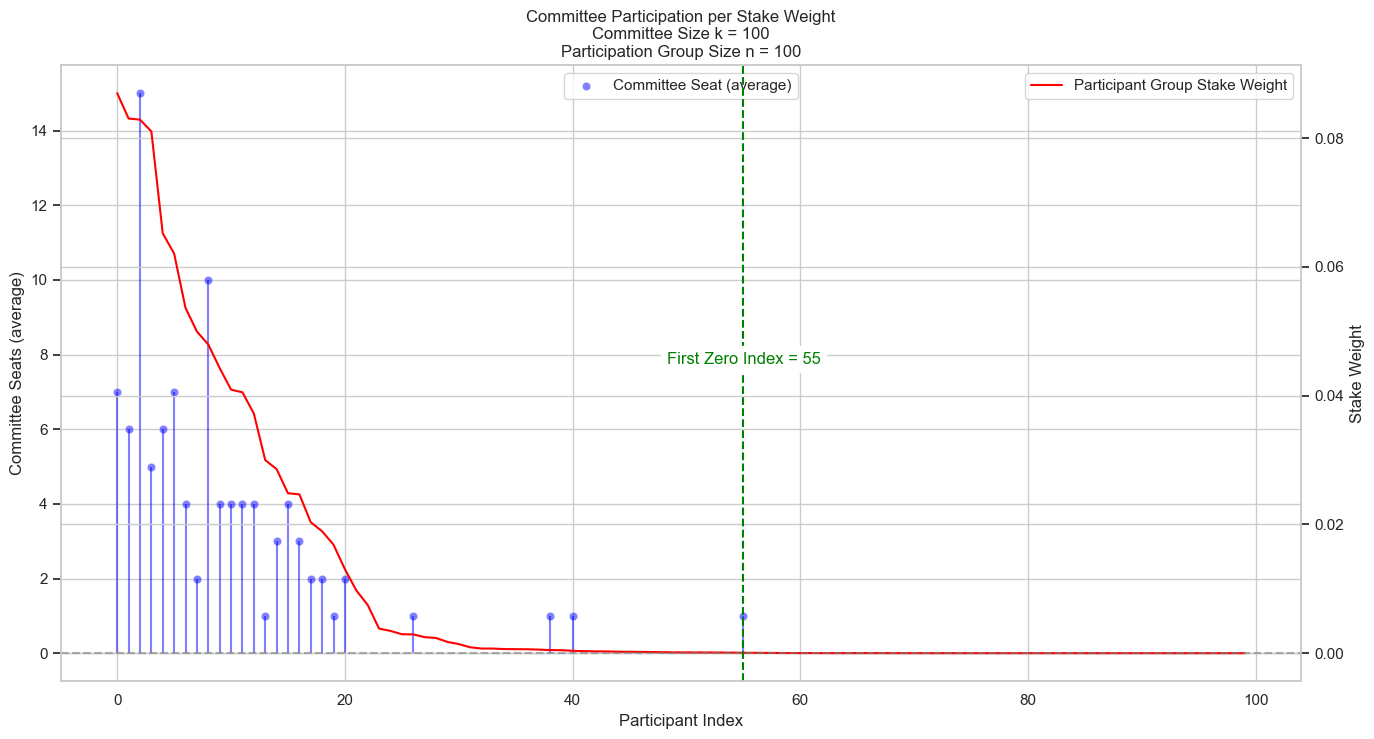

Group Size = 200


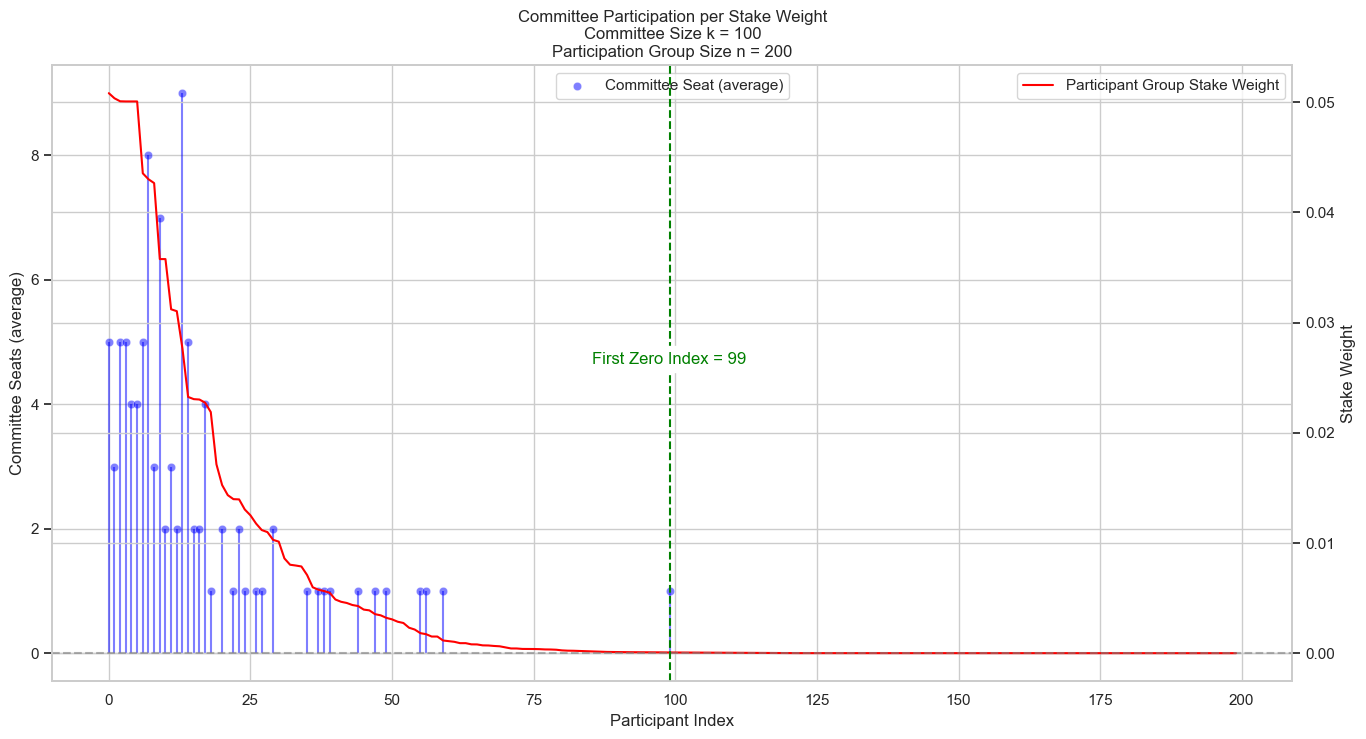

Group Size = 300


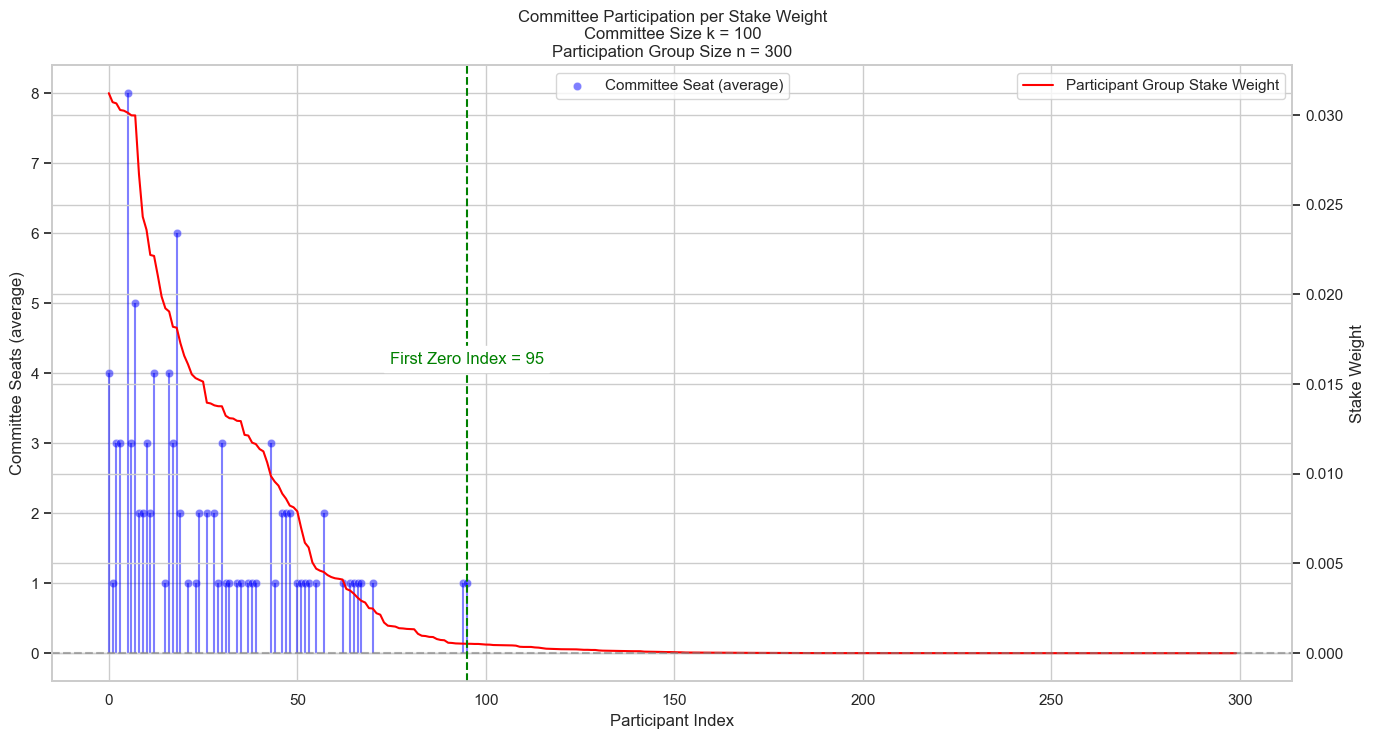

Group Size = 400


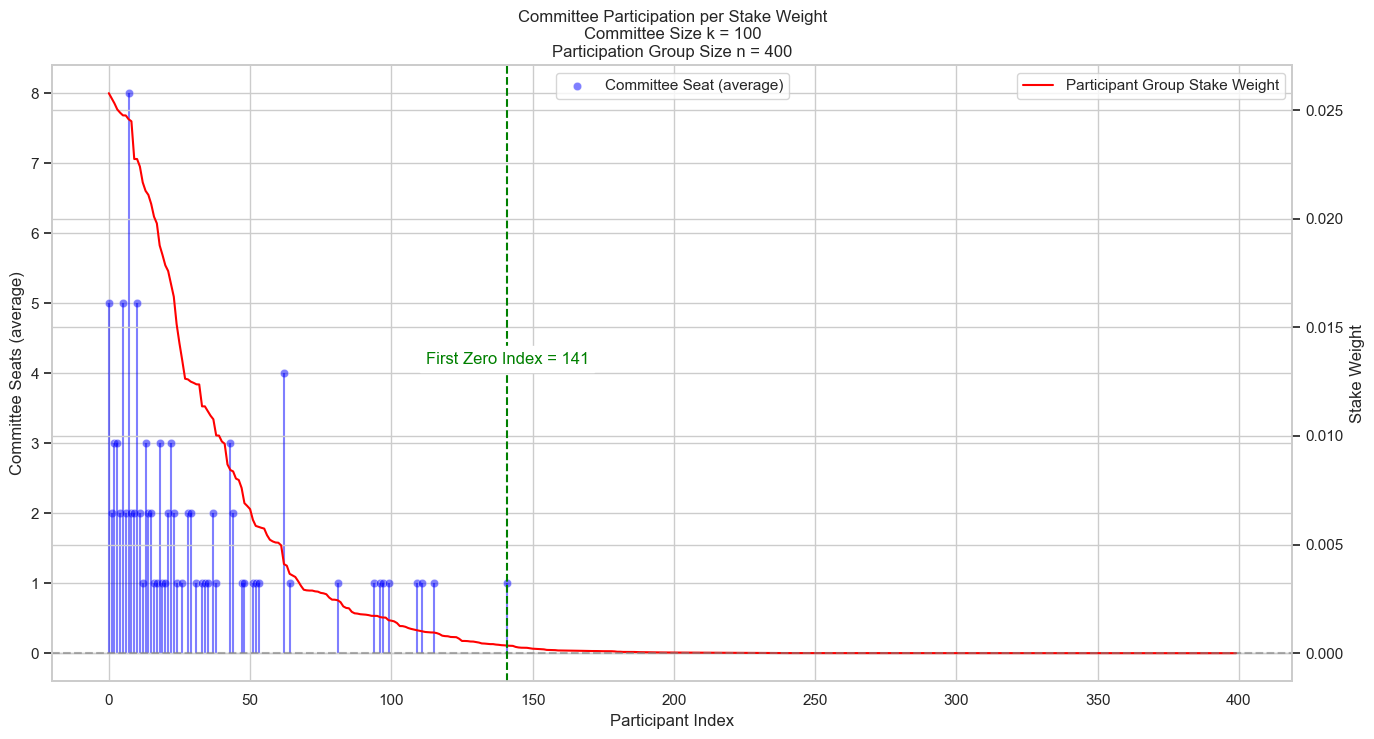

Group Size = 500


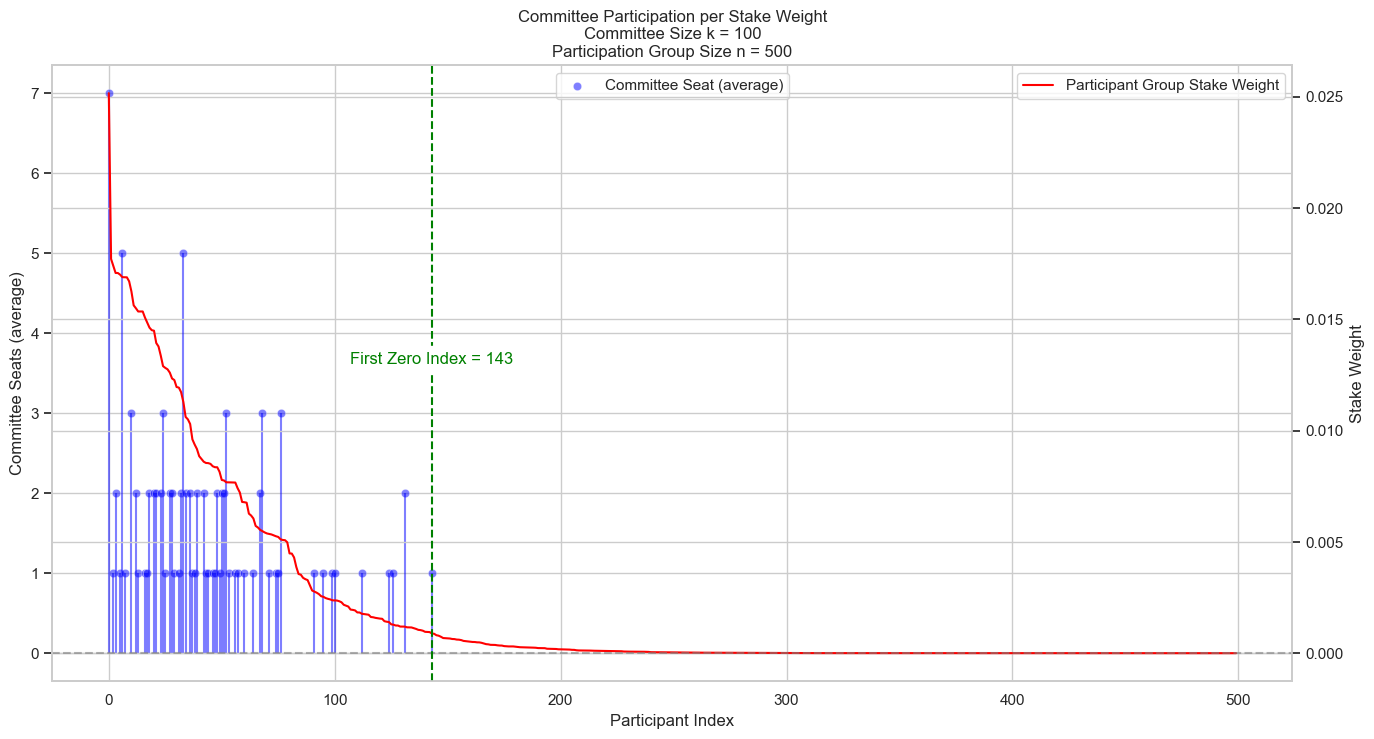


Committee Size = 200
Group Size = 100


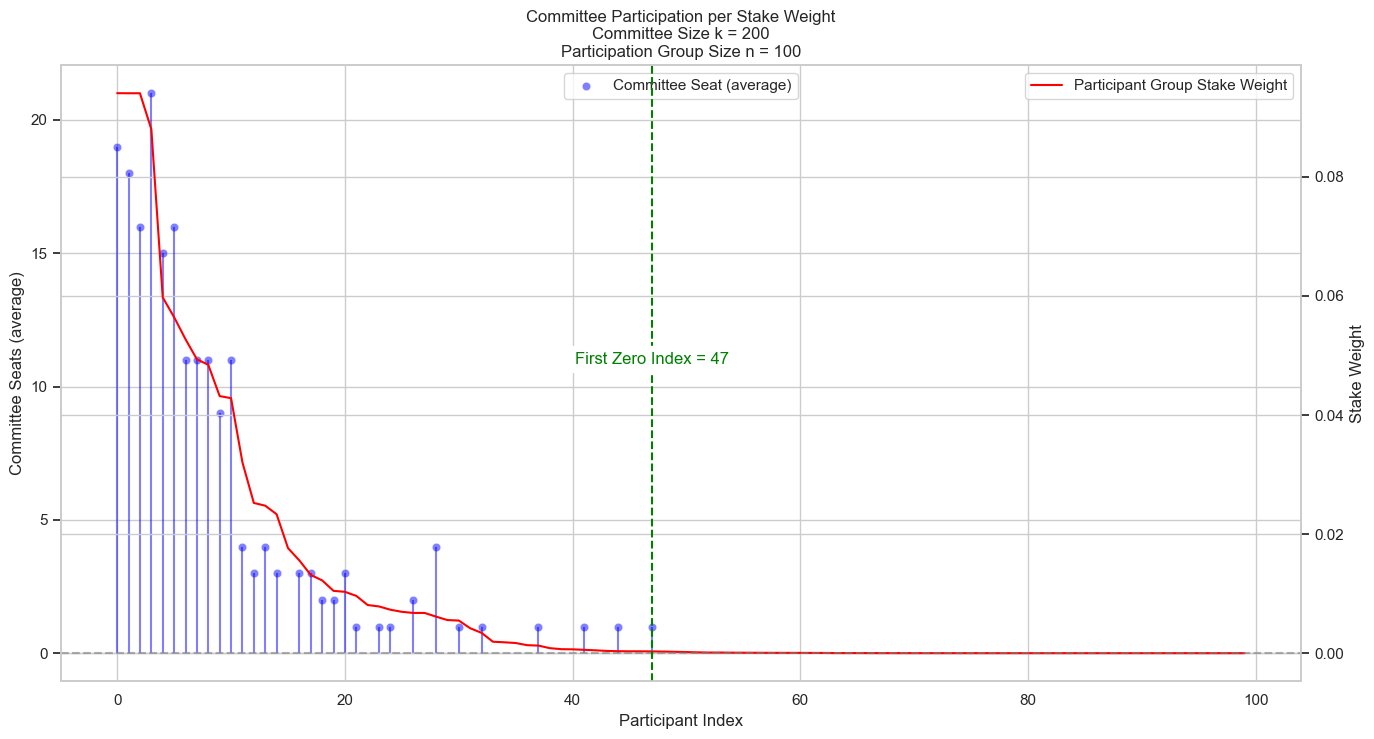

Group Size = 200


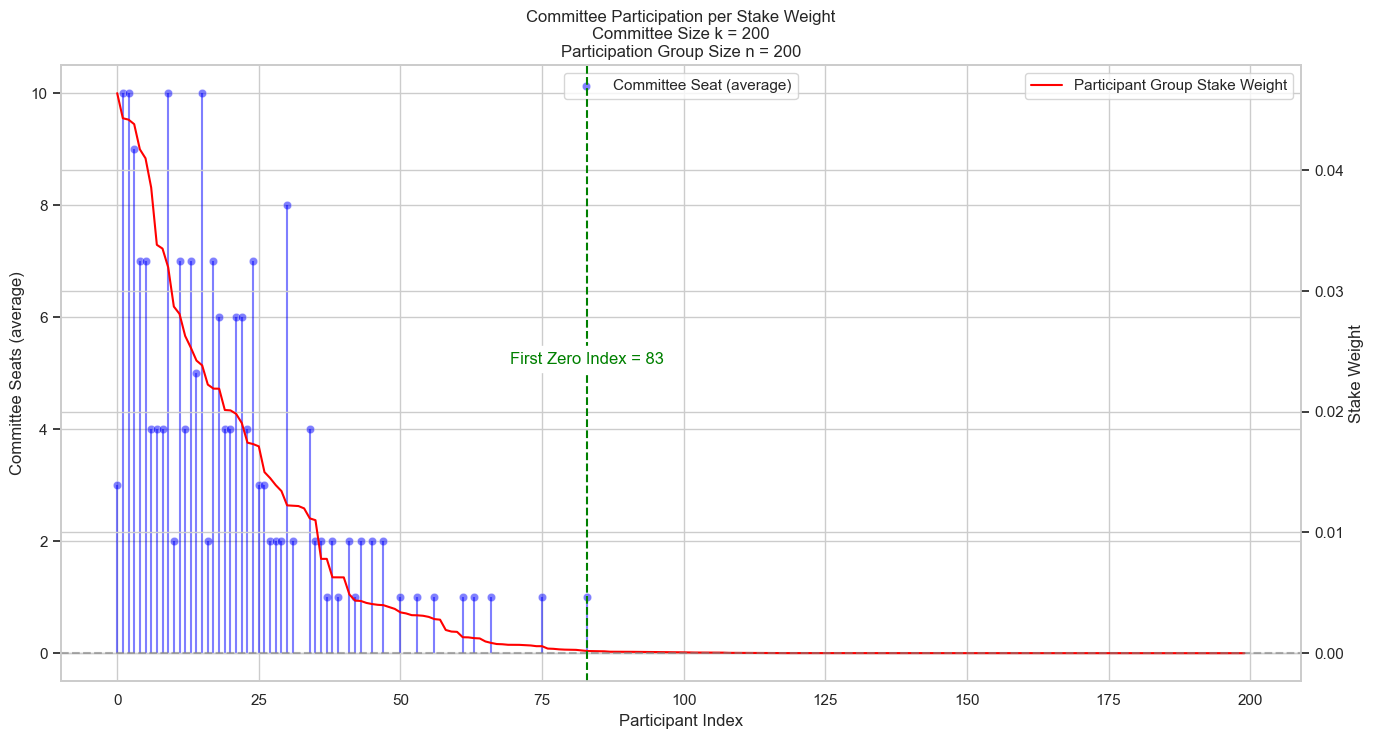

Group Size = 300


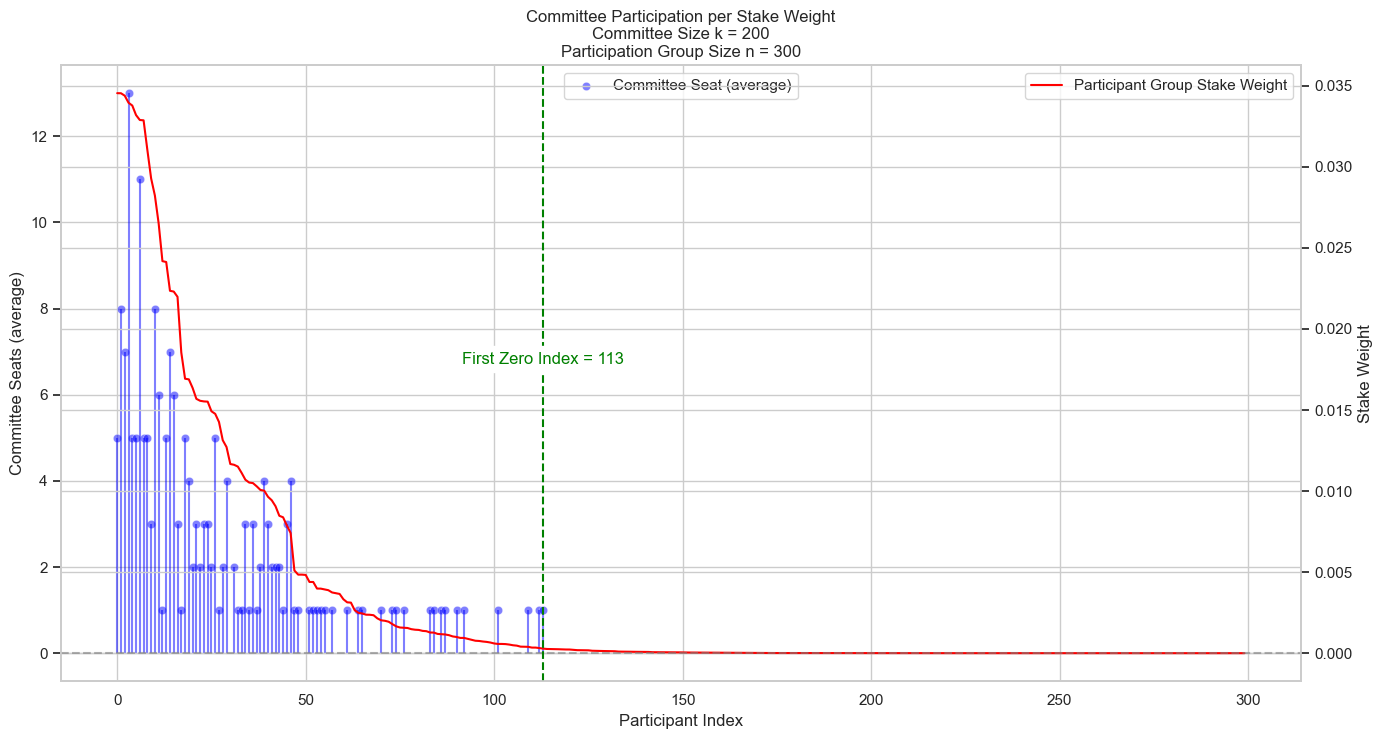

Group Size = 400


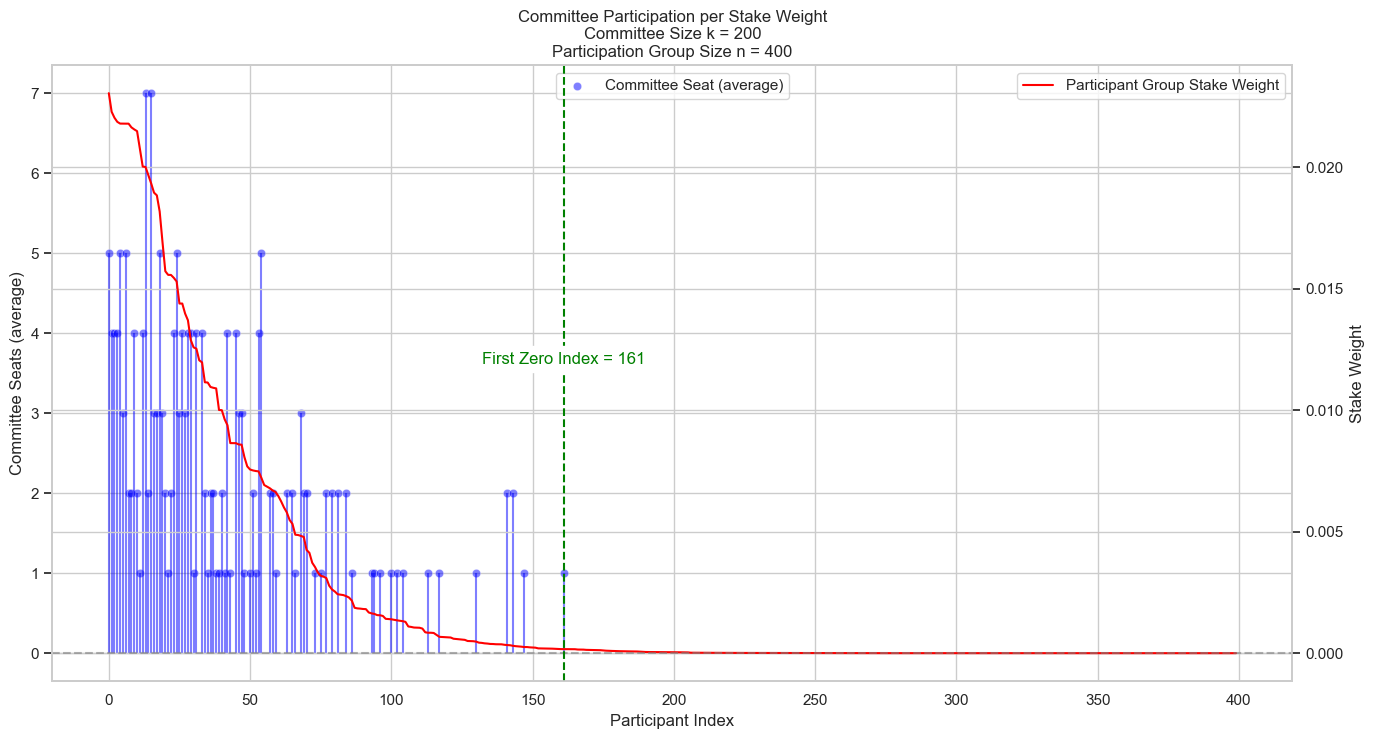

Group Size = 500


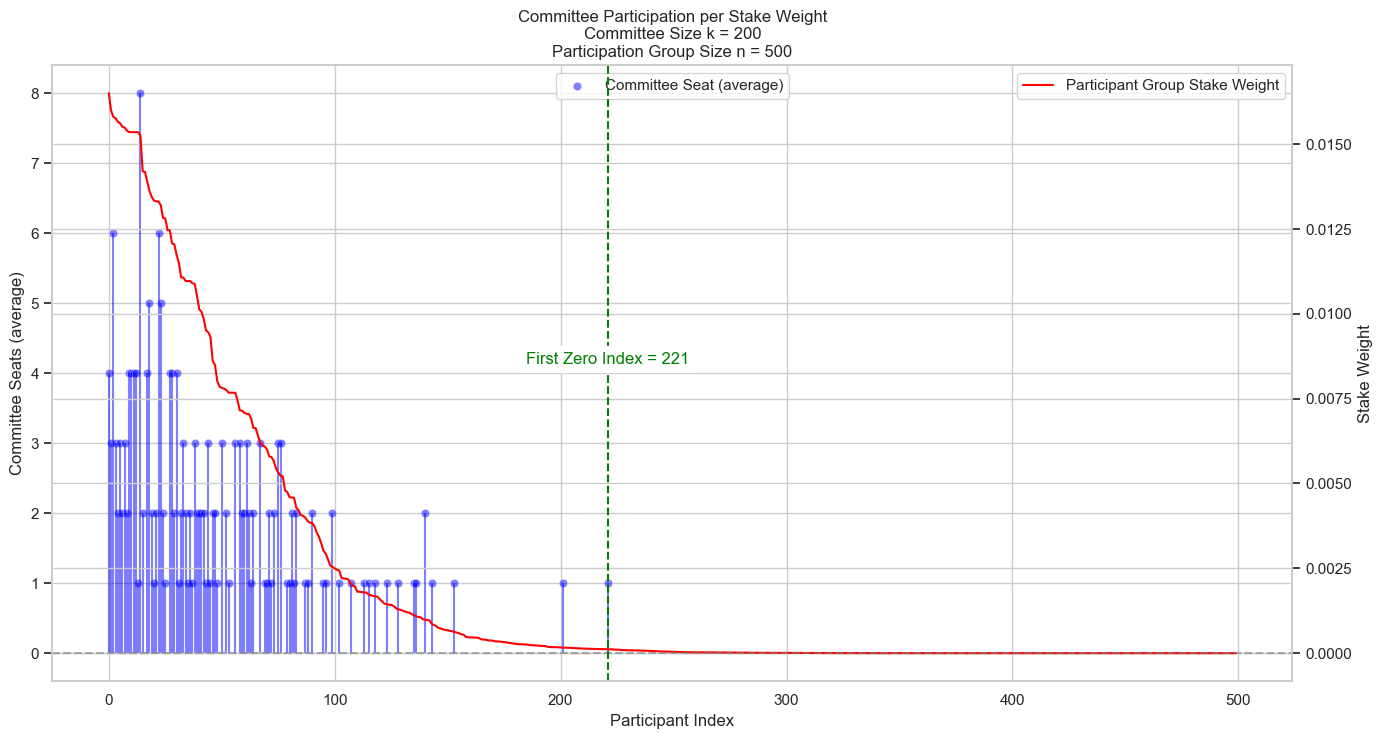


Committee Size = 300
Group Size = 100


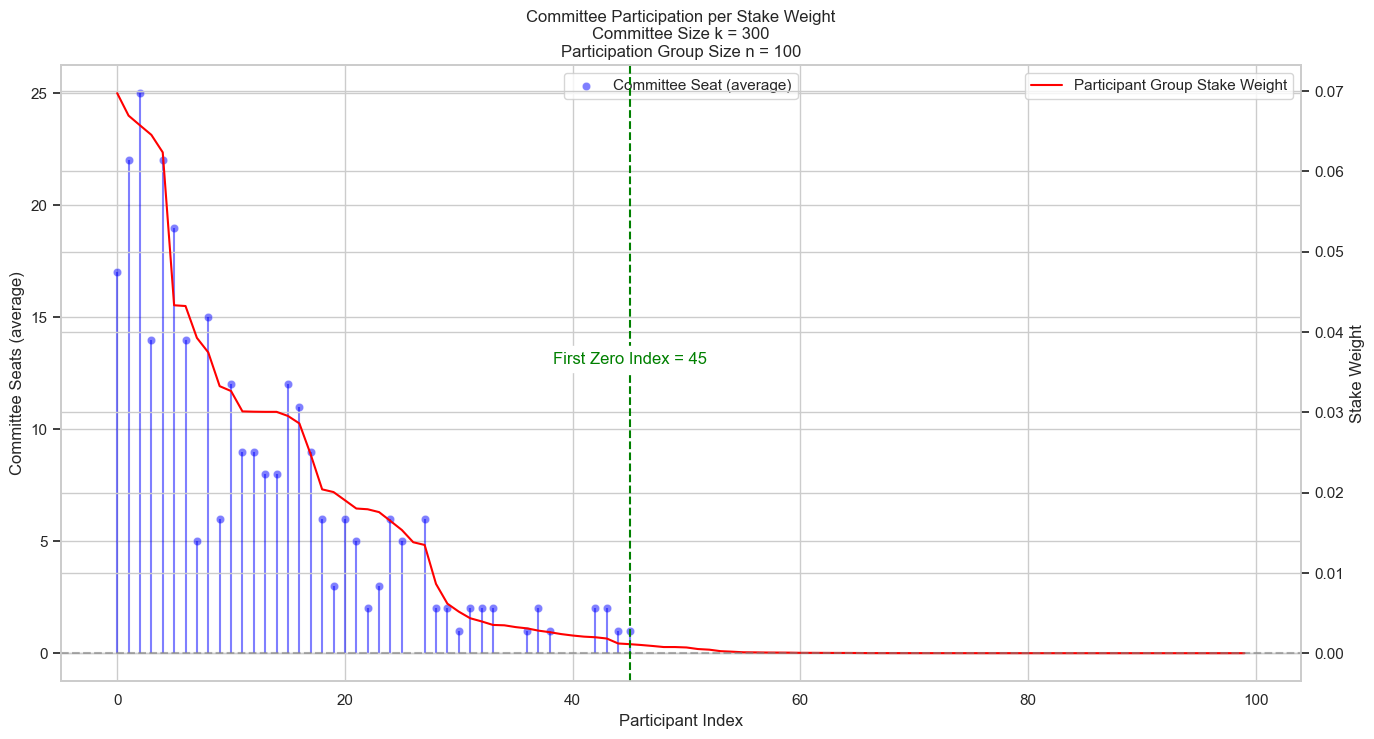

Group Size = 200


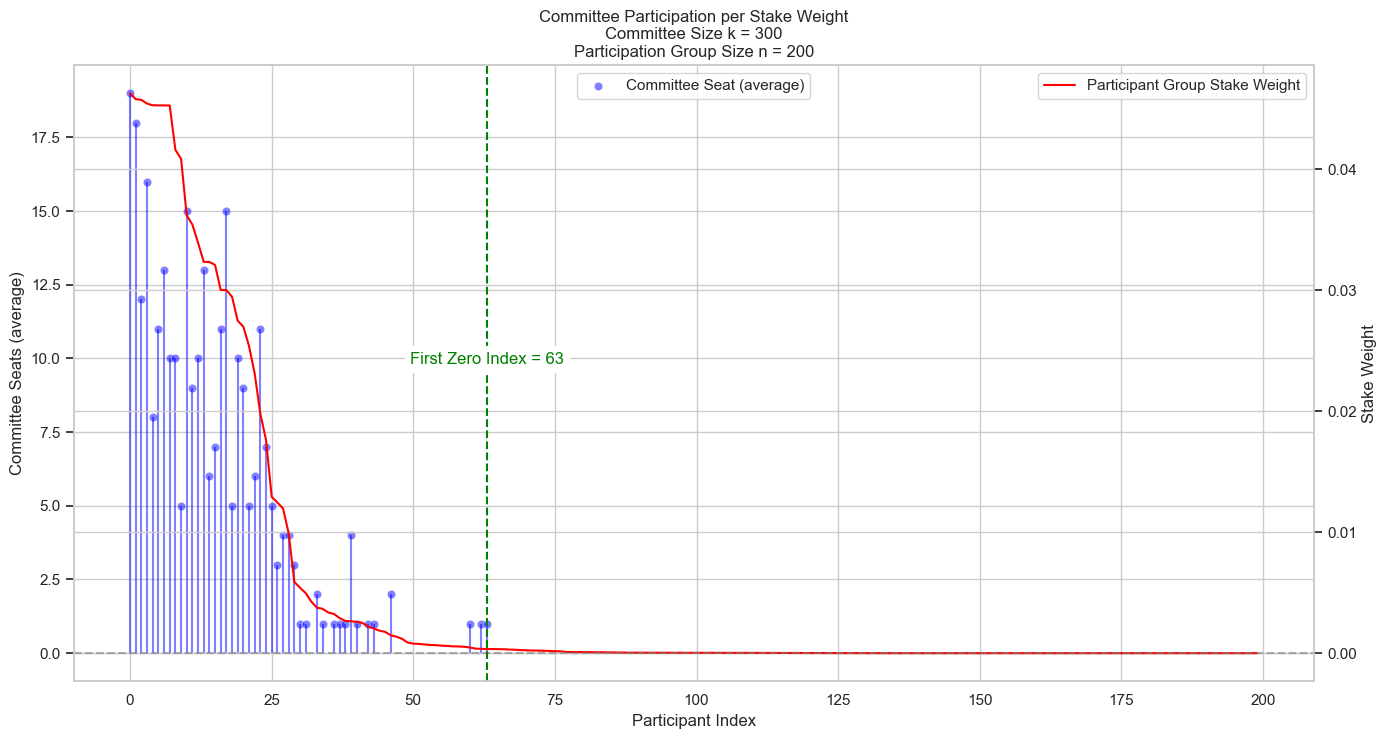

Group Size = 300


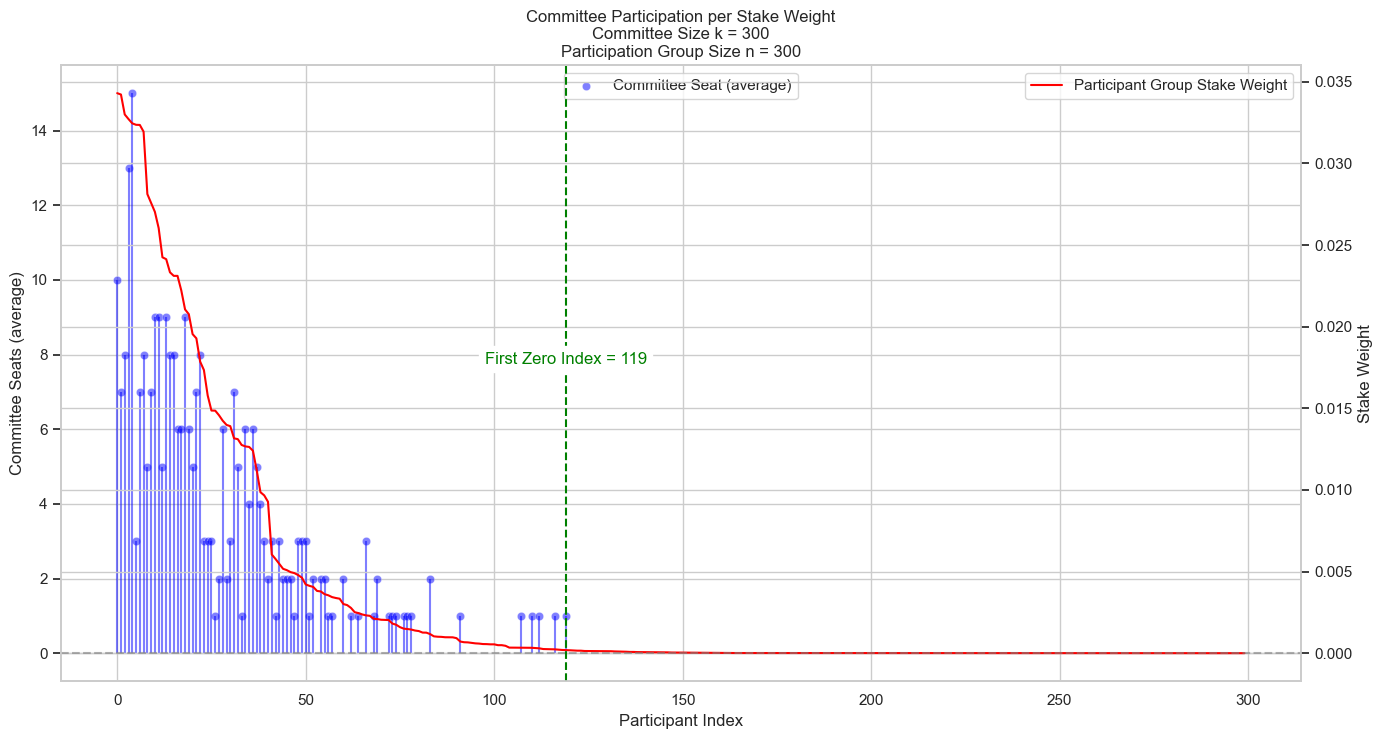

Group Size = 400


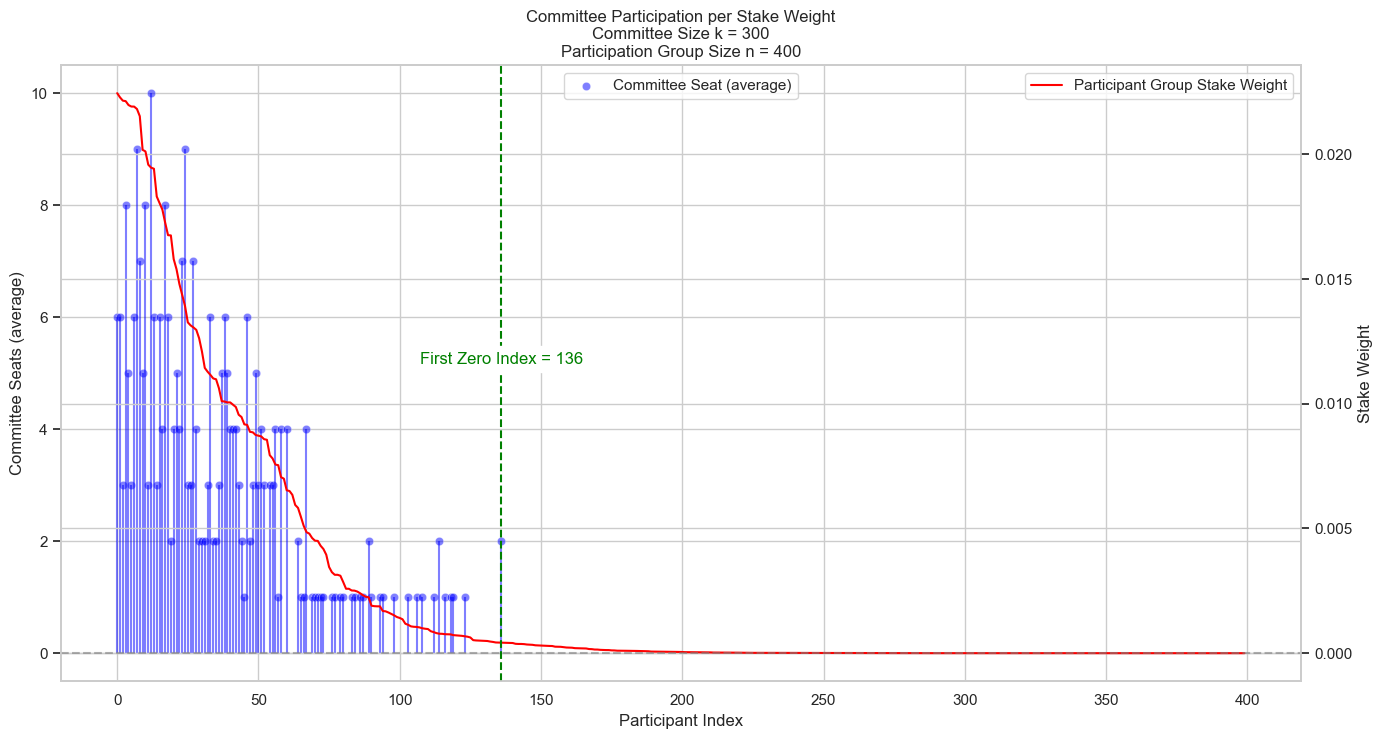

Group Size = 500


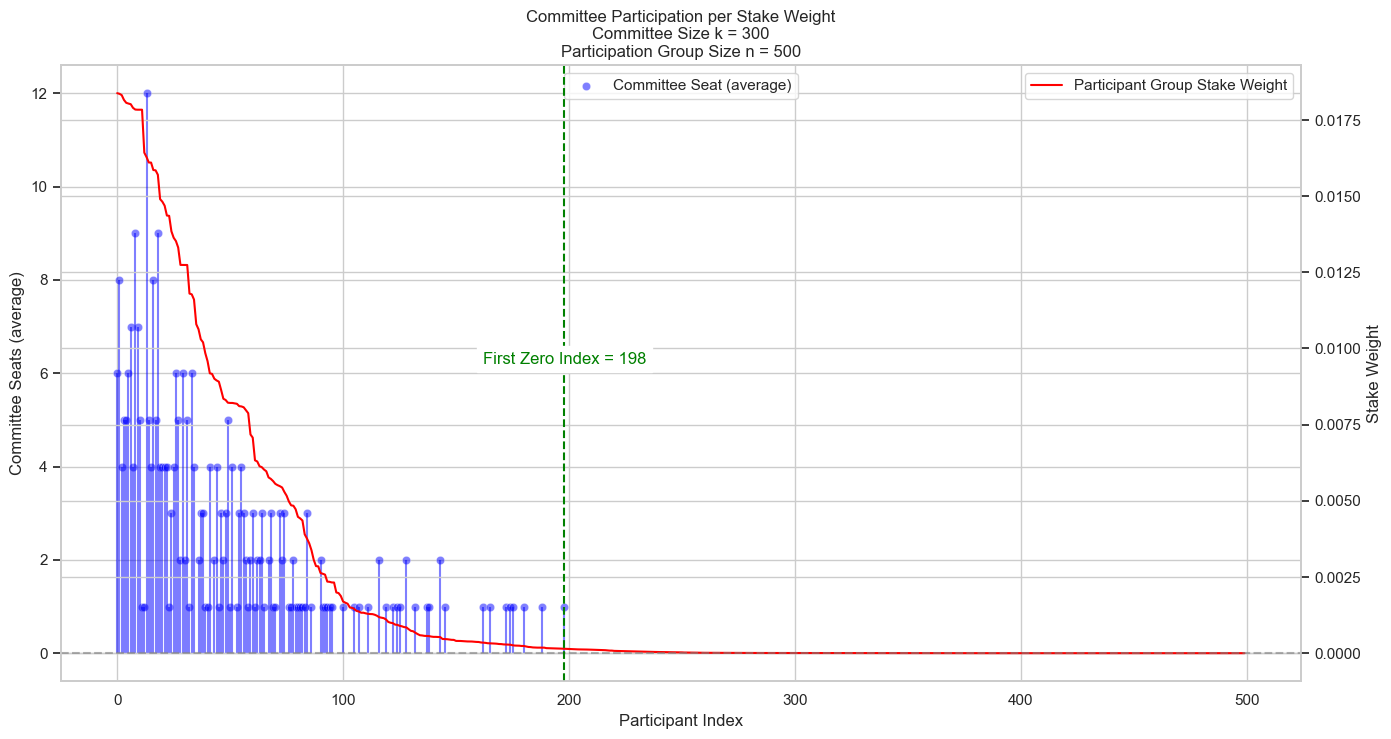


Committee Size = 400
Group Size = 100


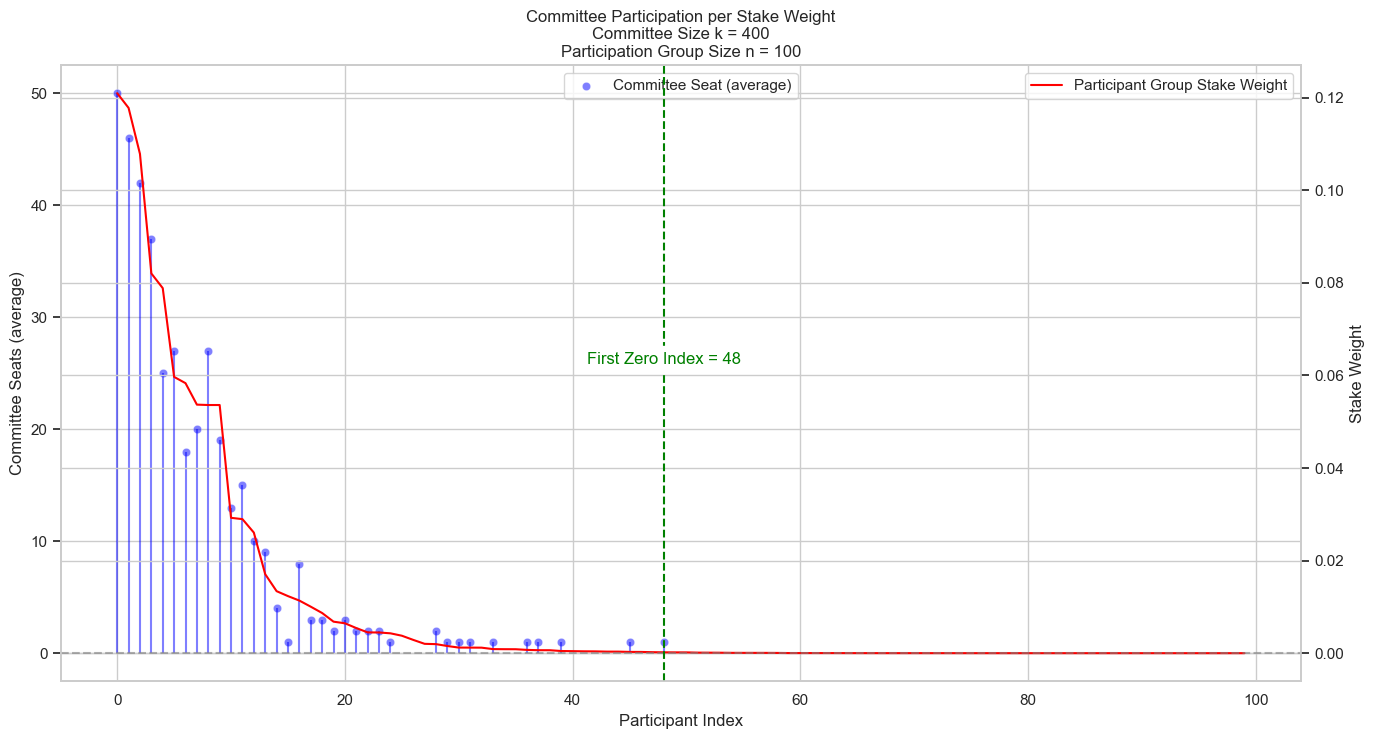

Group Size = 200


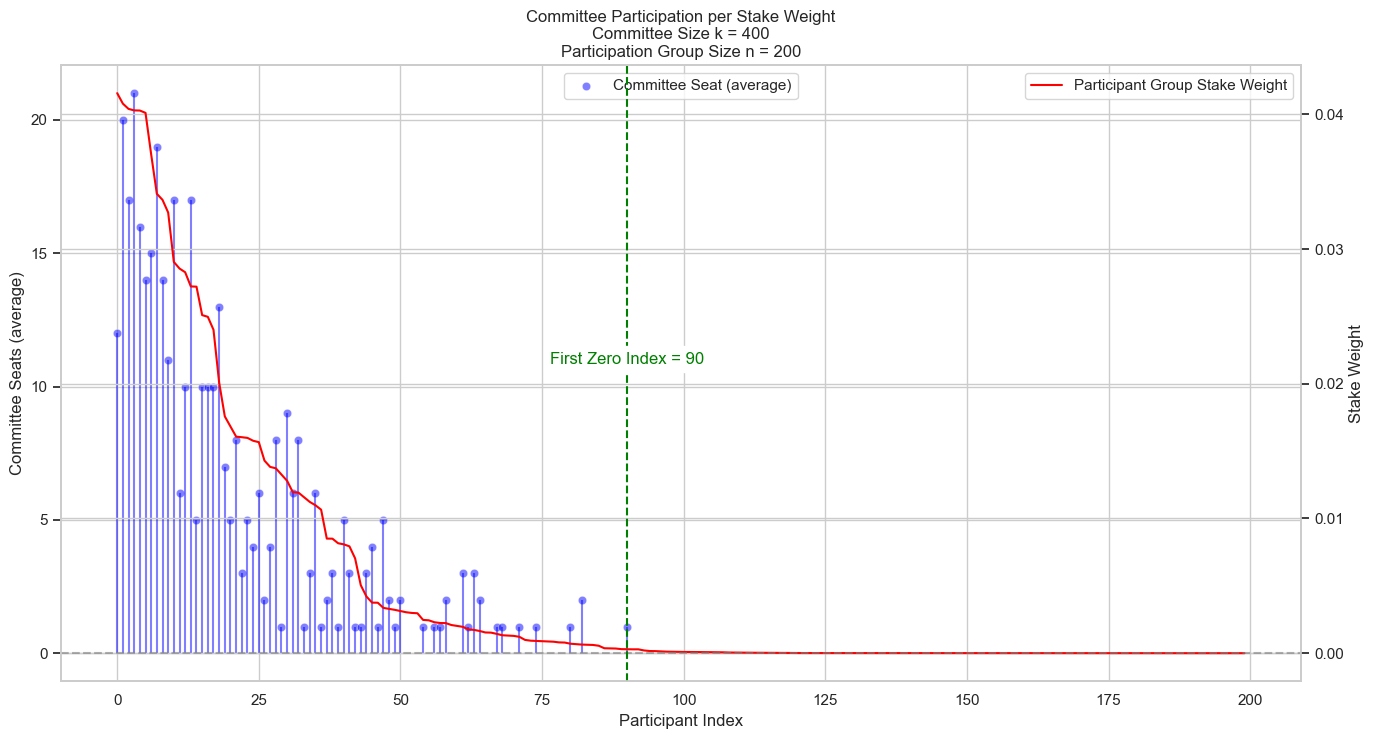

Group Size = 300


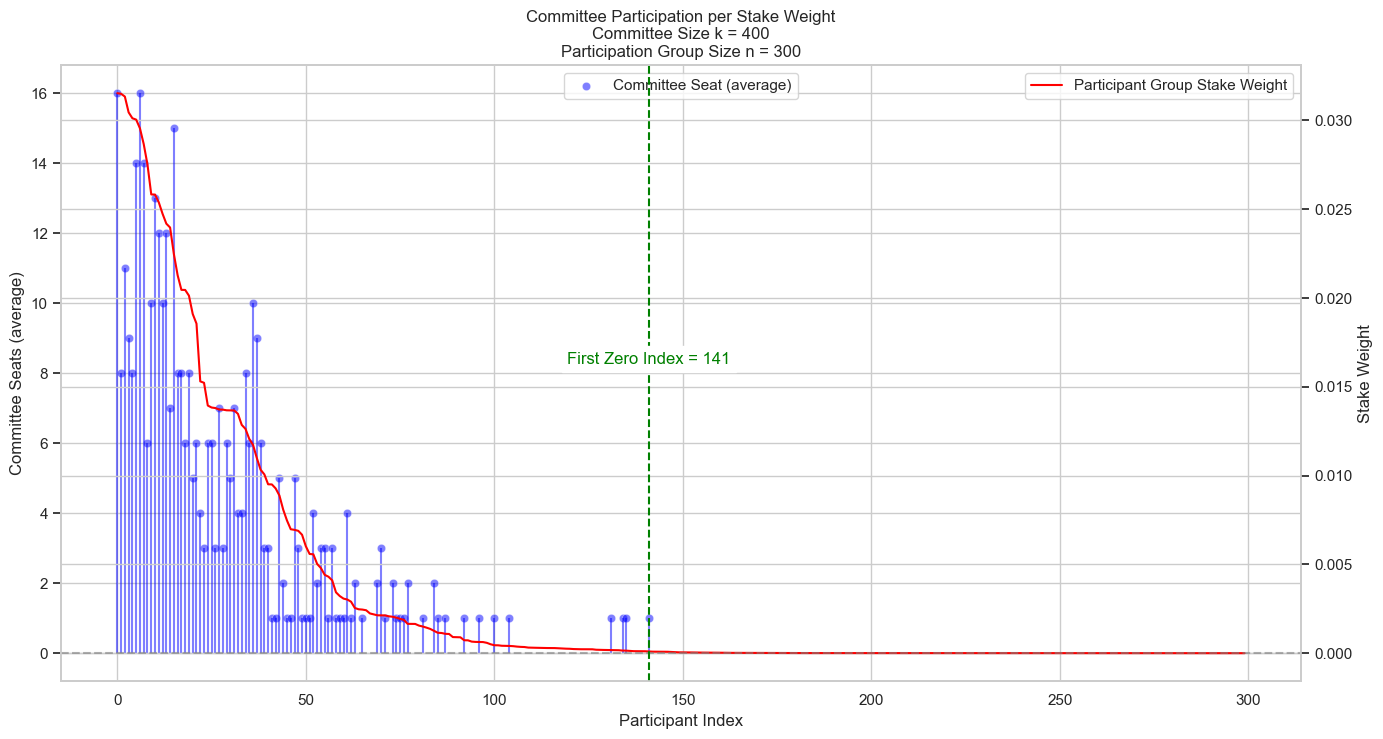

Group Size = 400


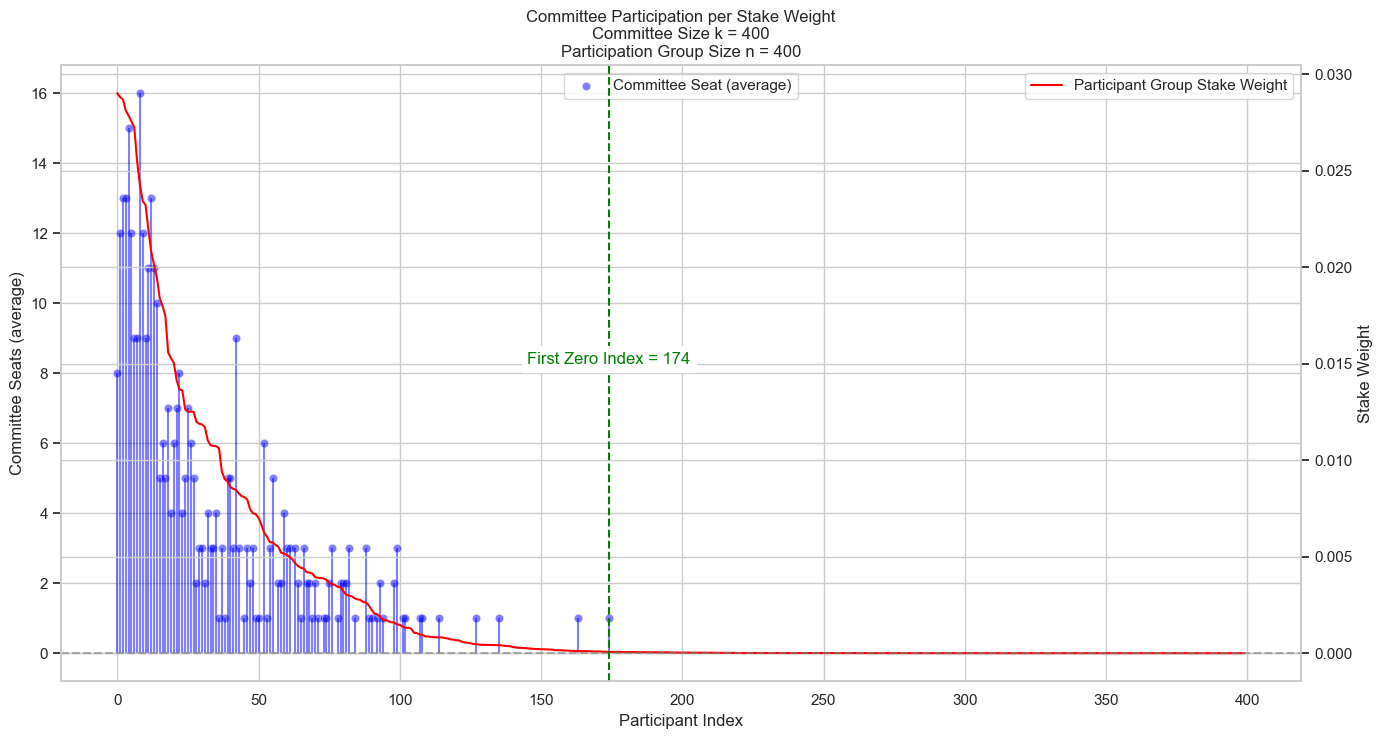

Group Size = 500


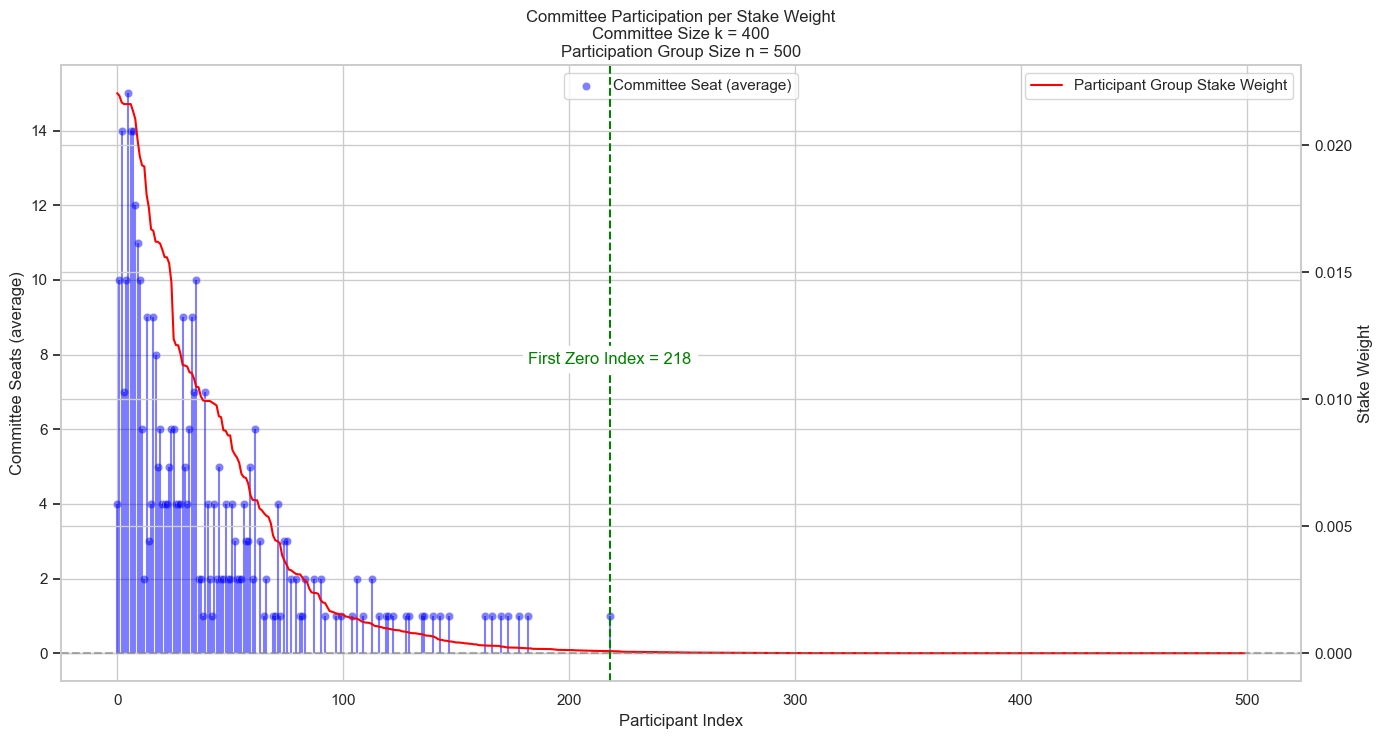


Committee Size = 500
Group Size = 100


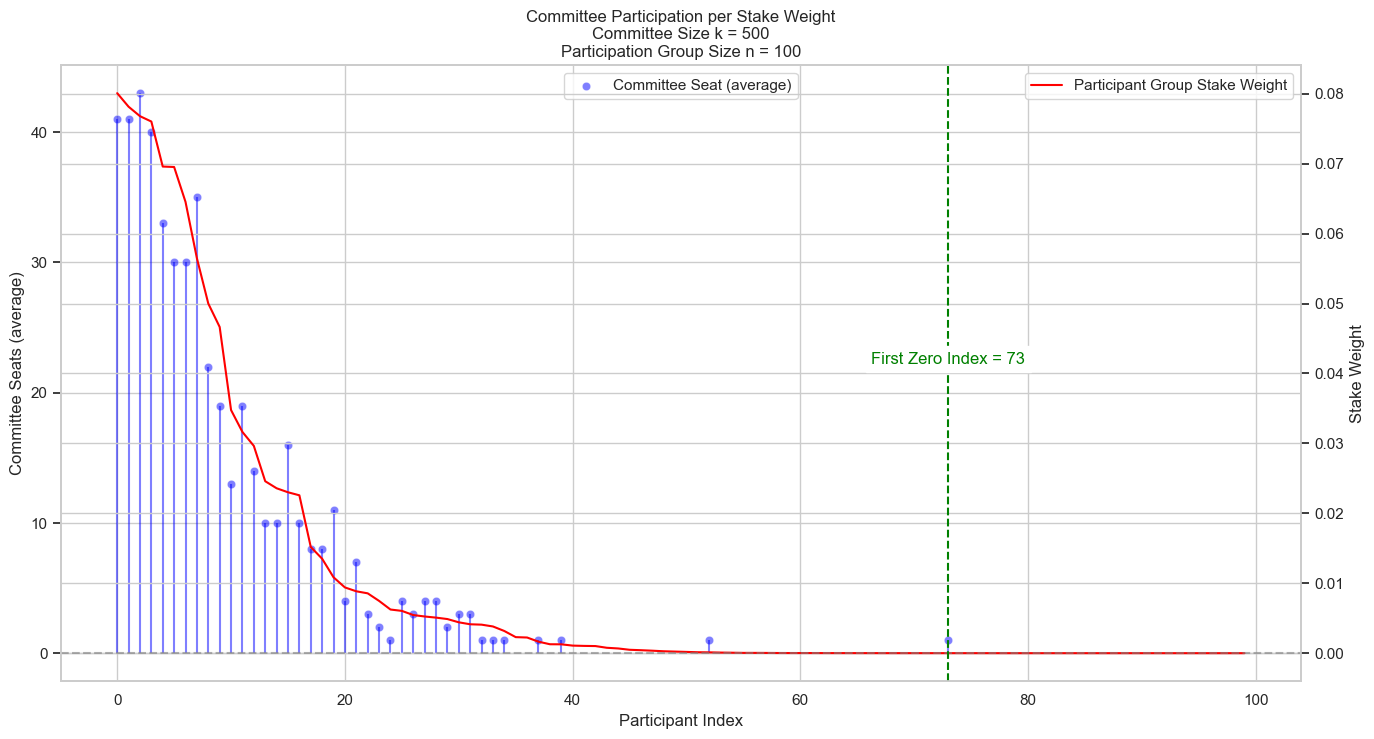

Group Size = 200


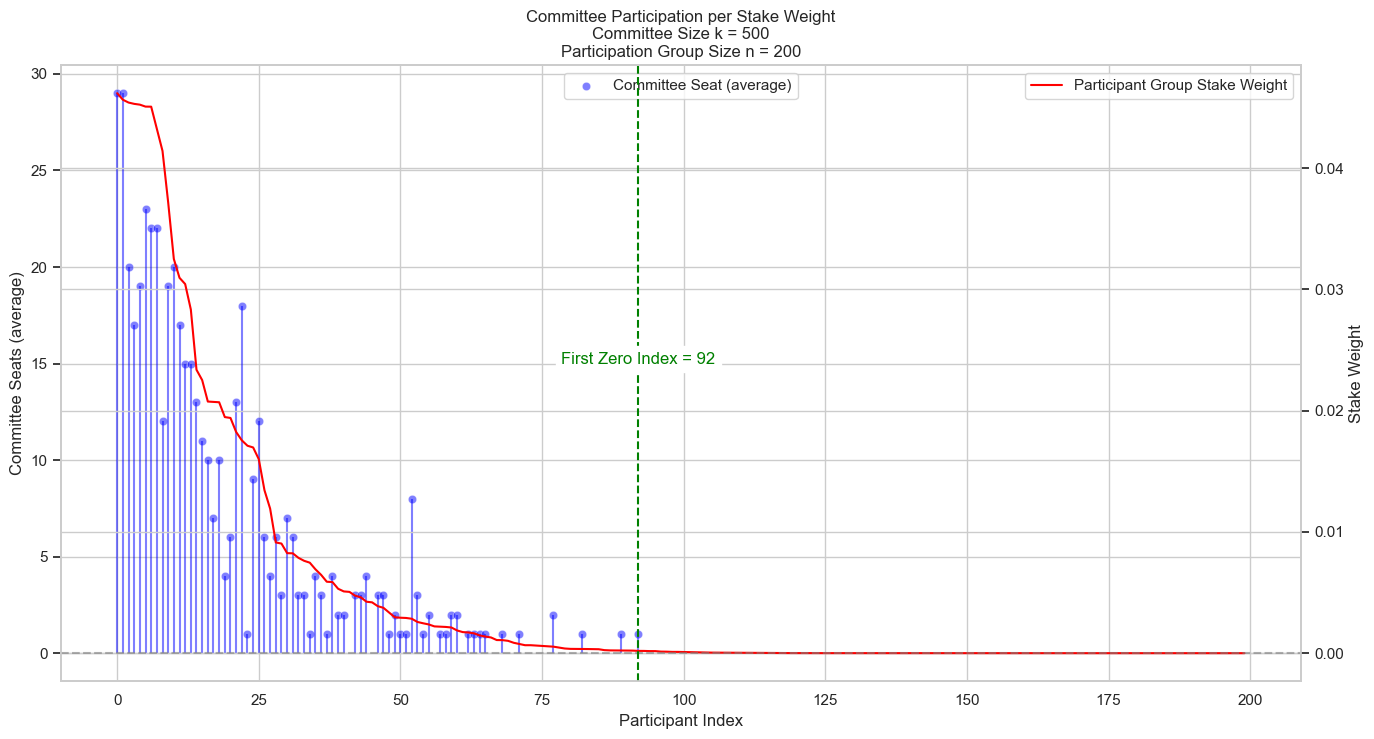

Group Size = 300


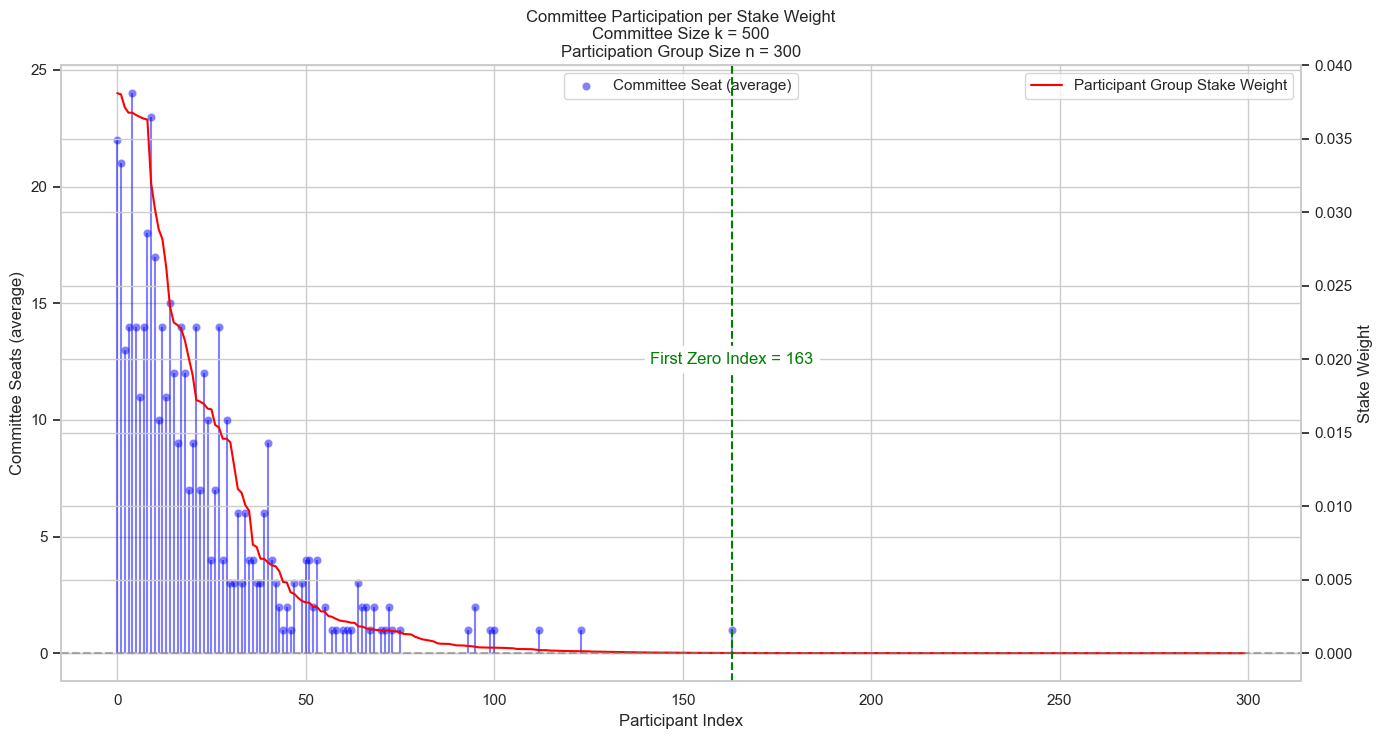

Group Size = 400


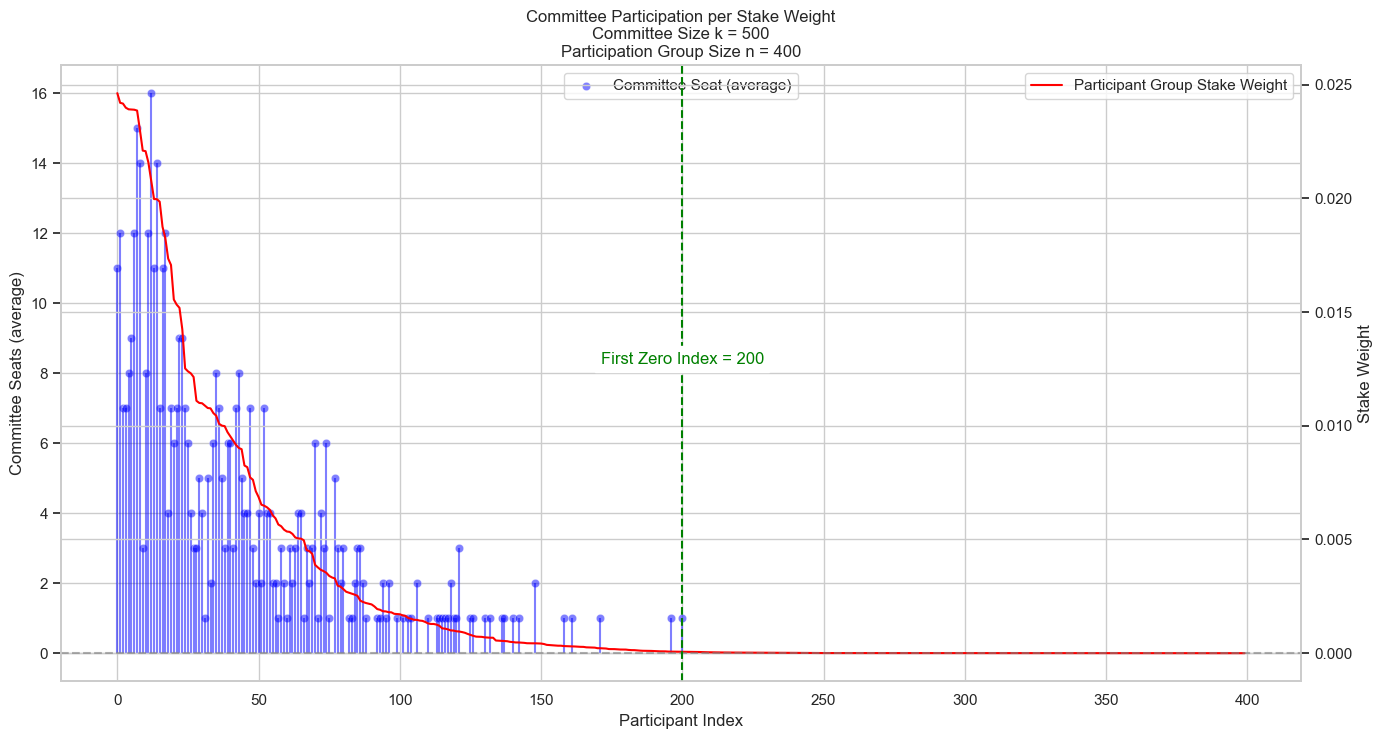

Group Size = 500


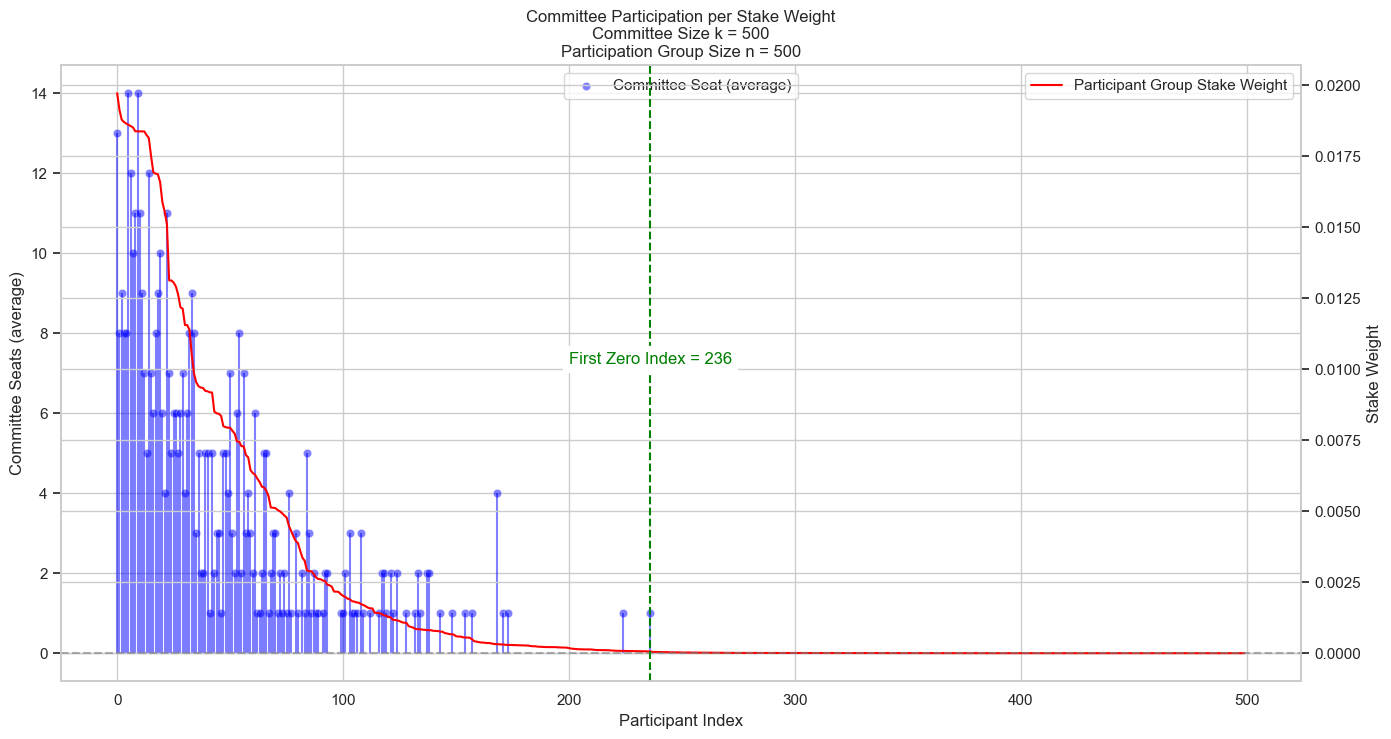

In [ ]:
# %%

# Call the function
sim_results_df = simulate(
    population,
    comm_sizes,
    group_sizes,
    num_iter,
    plot_it=True,
)

In [ ]:
# %%

# committee_seats_df = committee_seats_df.swaplevel(axis=1).sort_index(axis=1)

In [ ]:
# %%

# Extract the data for plotting

col_index = sim_results_df.columns
commitee_sizes = [
    int(col.split("=")[1].strip()) for col in col_index.get_level_values(0).unique()
]
group_sizes = [
    int(col.split("=")[1].strip()) for col in col_index.get_level_values(1).unique()
]

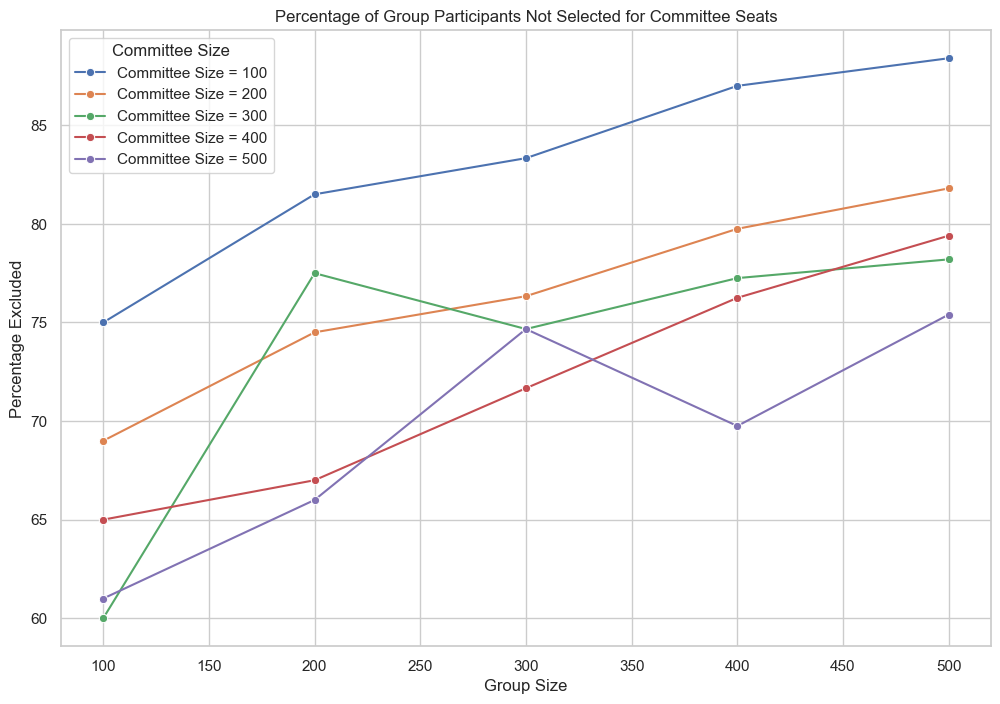

In [ ]:
# %%

# Plot the percentage of group participants excluded from a committee
# of a given size vs. different group sizes

fig, ax = plt.subplots(figsize=(12, 8))

sns.set(style="whitegrid")

for committee_size in commitee_sizes:
    committee_label = f"Committee Size = {committee_size}"
    committee_voters = sim_results_df.loc["Distinct Voters", committee_label]

    mean_values = committee_voters.loc["mean"]
    std_dev_values = committee_voters.loc["sd"]

    # Calculate the percentage of participants not selected for committee seats
    not_selected_percentages = (1.0 - mean_values / group_sizes) * 100
    not_selected_percentages.name = "Excluded (%)"

    # Create a DataFrame for easier plotting with seaborn
    plot_data = pd.DataFrame(
        {
            "Group Size": group_sizes,
            "Percentage Excluded": not_selected_percentages,
            "Std Dev": std_dev_values,
        }
    )

    # Plot the main line without error bars
    sns.lineplot(
        x="Group Size",
        y="Percentage Excluded",
        data=plot_data,
        marker="o",
        label=committee_label,
        ax=ax,
    )

ax.set_ylabel("Percentage Excluded")
ax.set_xlabel("Group Size")
ax.legend(title="Committee Size")
plt.title("Percentage of Group Participants Not Selected for Committee Seats")
plt.grid(True)
plt.show()

In [ ]:
# %%

sim_results_df.loc["Distinct Voters", :]

Committee Size Committee Size = 100                                    \
Group Size         Group Size = 100 Group Size = 200 Group Size = 300   
mean                           25.0             37.0             50.0   
sd                              0.0              0.0              0.0   

Committee Size                                   Committee Size = 200  \
Group Size     Group Size = 400 Group Size = 500     Group Size = 100   
mean                       52.0             58.0                 31.0   
sd                          0.0              0.0                  0.0   

Committee Size                                                     \
Group Size     Group Size = 200 Group Size = 300 Group Size = 400   
mean                       51.0             71.0             81.0   
sd                          0.0              0.0              0.0   

Committee Size                   ... Committee Size = 400                   \
Group Size     Group Size = 500  ...     Group Size = 100 Group Size = 200   
mean                       91.0  ...                 35.0             66.0   
sd                          0.0  ...                  0.0              0.0   

Committee Size                                                     \
Group Size     Group Size = 300 Group Size = 400 Group Size = 500   
mean                       85.0             95.0            103.0   
sd                          0.0              0.0              0.0   

Committee Size Committee Size = 500                                    \
Group Size         Group Size = 100 Group Size = 200 Group Size = 300   
mean                           39.0             68.0             76.0   
sd                              0.0              0.0              0.0   

Committee Size                                    
Group Size     Group Size = 400 Group Size = 500  
mean                      121.0            123.0  
sd                          0.0              0.0  

[2 rows x 25 columns]

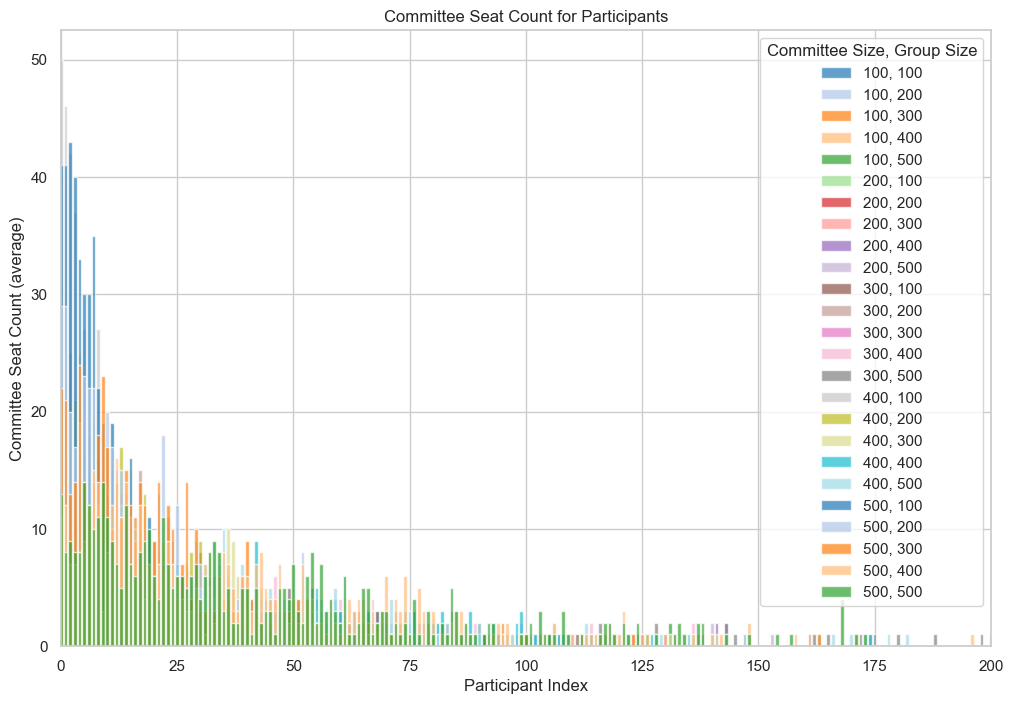

In [ ]:
# %%

# Plot the committee selection counts distribution
fig = plt.figure(figsize=(12, 8))

plot_data = sim_results_df.loc["Committee Seats"].loc["mean"]

for c, g in plot_data.index:

    y = plot_data.loc[(c, g)]
    x = y.index

    n_c = int(c.split("=")[1].strip())
    n_g = int(g.split("=")[1].strip())

    colors = sns.color_palette("tab20", len(plot_data.index))
    color_idx = list(plot_data.index).index((c, g))
    plt.bar(x, y, alpha=0.7, color=colors[color_idx], label=f"{n_c}, {n_g}")

plt.xlabel("Participant Index")
plt.ylabel("Committee Seat Count (average)")
plt.title("Committee Seat Count for Participants")
plt.legend(title="Committee Size, Group Size")
plt.xlim(0, 200)
plt.show()

In [ ]:
# %%

# Distinct Voters
committee_voters = sim_results_df.loc["Distinct Voters"]

# Create a DataFrame row from the computed percentages
mean_values = committee_voters.loc["mean"]
std_dev_values = committee_voters.loc["sd"]

# Calculate the percentage of participants not selected for committee seats
print("Percentage of Group Participants Not Selected for Committee Seats:")
committee_participation = pd.concat([mean_values, std_dev_values], axis=1)
# committee_participation.columns = ["Mean", "Std Dev"]

print(committee_participation)

Percentage of Group Participants Not Selected for Committee Seats:
                                        mean   sd
Committee Size       Group Size                  
Committee Size = 100 Group Size = 100   25.0  0.0
                     Group Size = 200   37.0  0.0
                     Group Size = 300   50.0  0.0
                     Group Size = 400   52.0  0.0
                     Group Size = 500   58.0  0.0
Committee Size = 200 Group Size = 100   31.0  0.0
                     Group Size = 200   51.0  0.0
                     Group Size = 300   71.0  0.0
                     Group Size = 400   81.0  0.0
                     Group Size = 500   91.0  0.0
Committee Size = 300 Group Size = 100   40.0  0.0
                     Group Size = 200   45.0  0.0
                     Group Size = 300   76.0  0.0
                     Group Size = 400   91.0  0.0
                     Group Size = 500  109.0  0.0
Committee Size = 400 Group Size = 100   35.0  0.0
                     Group Size =

In [ ]:
# %%

# Prepare the DataFrame for concatenation with the other simulation results
committee_participation = committee_participation.T
committee_participation.index = pd.MultiIndex.from_tuples(
    [("Committee Participation %", "mean"), ("Committee Participation %", "sd")]
)

# Concatenate this new row to the simulation results DataFrame
sim_results_df = pd.concat([sim_results_df, committee_participation], axis=0)

sim_results_df

Committee Size                                               Committee Size = 100  \
Group Size                                                       Group Size = 100   
Distinct Voters           mean                                               25.0   
                          sd                                                  0.0   
Committee Seats           mean  0      7.0
1      6.0
2     15.0
3      5.0
4 ...   
Committee Participation % mean                                               25.0   
                          sd                                                  0.0   

Committee Size                                                                     \
Group Size                                                       Group Size = 200   
Distinct Voters           mean                                               37.0   
                          sd                                                  0.0   
Committee Seats           mean  0      5.0
1      3.0
2      5.0
3      5.0
4 ...   
Committee Participation % mean                                               37.0   
                          sd                                                  0.0   

Committee Size                                                                     \
Group Size                                                       Group Size = 300   
Distinct Voters           mean                                               50.0   
                          sd                                                  0.0   
Committee Seats           mean  0      4.0
1      1.0
2      3.0
3      3.0
4 ...   
Committee Participation % mean                                               50.0   
                          sd                                                  0.0   

Committee Size                                                                     \
Group Size                                                       Group Size = 400   
Distinct Voters           mean                                               52.0   
                          sd                                                  0.0   
Committee Seats           mean  0      5.0
1      2.0
2      3.0
3      3.0
4 ...   
Committee Participation % mean                                               52.0   
                          sd                                                  0.0   

Committee Size                                                                     \
Group Size                                                       Group Size = 500   
Distinct Voters           mean                                               58.0   
                          sd                                                  0.0   
Committee Seats           mean  0      7.0
1      0.0
2      1.0
3      2.0
4 ...   
Committee Participation % mean                                               58.0   
                          sd                                                  0.0   

Committee Size                                               Committee Size = 200  \
Group Size                                                       Group Size = 100   
Distinct Voters           mean                                               31.0   
                          sd                                                  0.0   
Committee Seats           mean  0     19.0
1     18.0
2     16.0
3     21.0
4 ...   
Committee Participation % mean                                               31.0   
                          sd                                                  0.0   

Committee Size                                                                     \
Group Size                                                       Group Size = 200   
Distinct Voters           mean                                               51.0   
                          sd                                                  0.0   
Committee Seats           mean  0       3.0
1      10.0
2      10.0
3       9....   

In [ ]:
# %%

# Let's now create a plots of committee assignments where we vary
# the group size over {100, 200, 300, 400, 500} and see how the
# committee selection and seat count changes.

# Initialize Parameters:
# comm_sizes = [100]  # vary over committee size, k
# group_sizes = [100]  # vary over group size, n
comm_sizes = [100, 200, 300, 400, 500]  # vary over committee size, k
group_sizes = [100, 200, 300, 400, 500]  # vary over group size, n
num_iter = 30  # Number of iterations for Monte Carlo simulation

# Note that the number of iterations here can be interpreted as the number
# of selection rounds for the committee, which we call an epoch.
# If we have a new epoch per day, then 1000 iterations is about 3 years.


Committee Size = 100
Group Size = 100


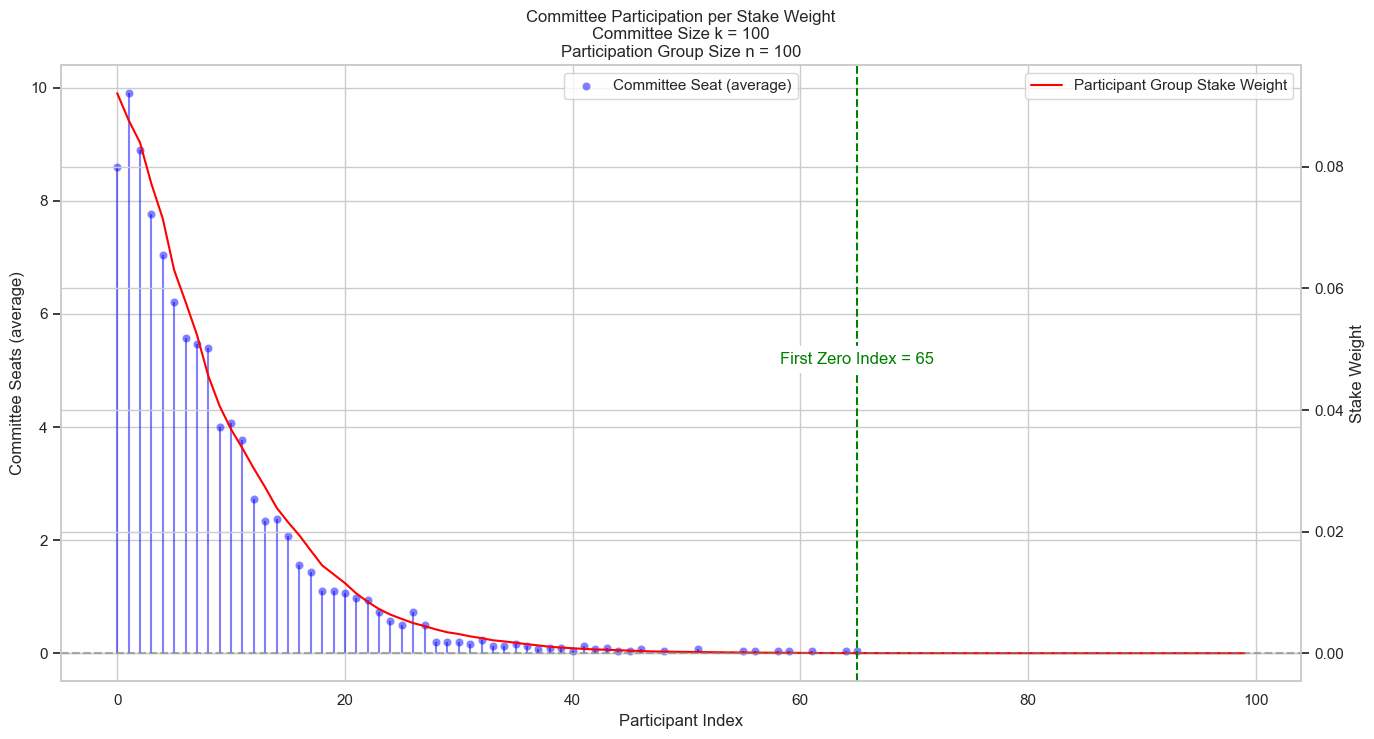

Group Size = 200


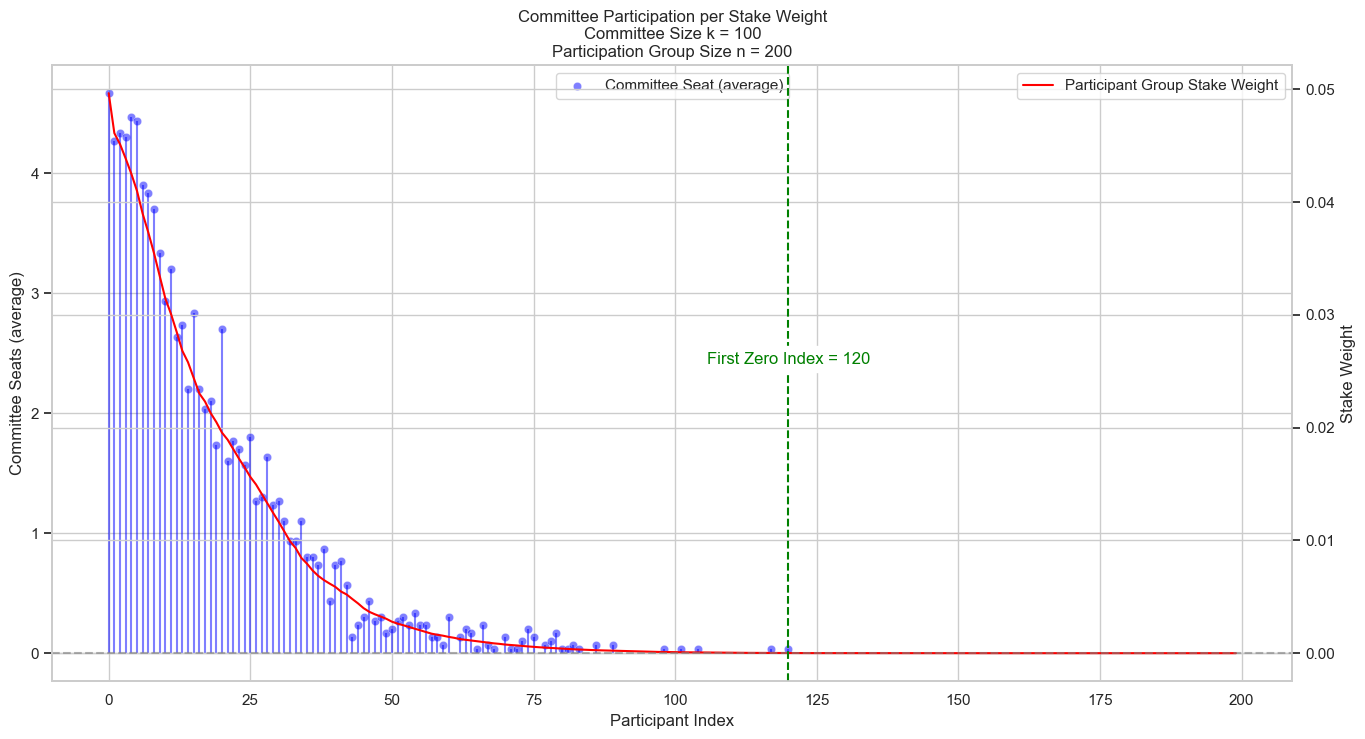

Group Size = 300


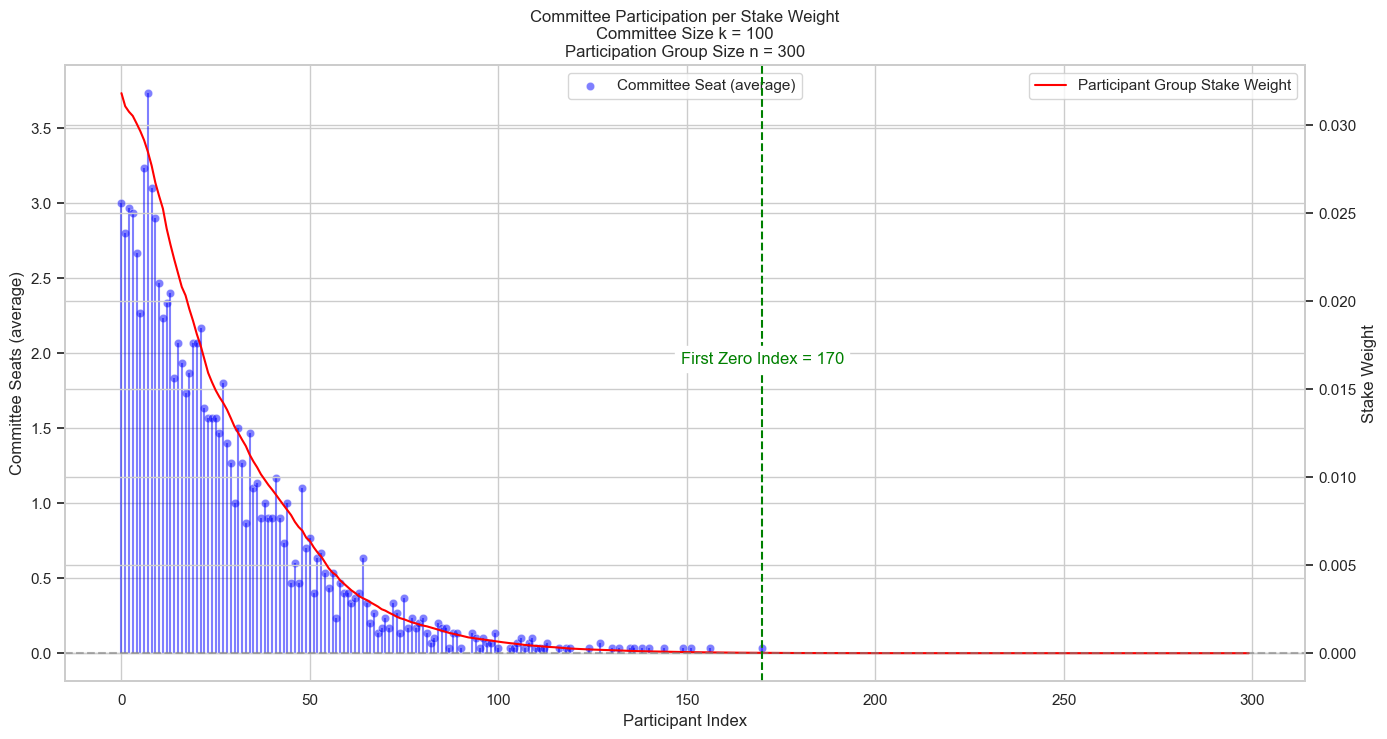

Group Size = 400


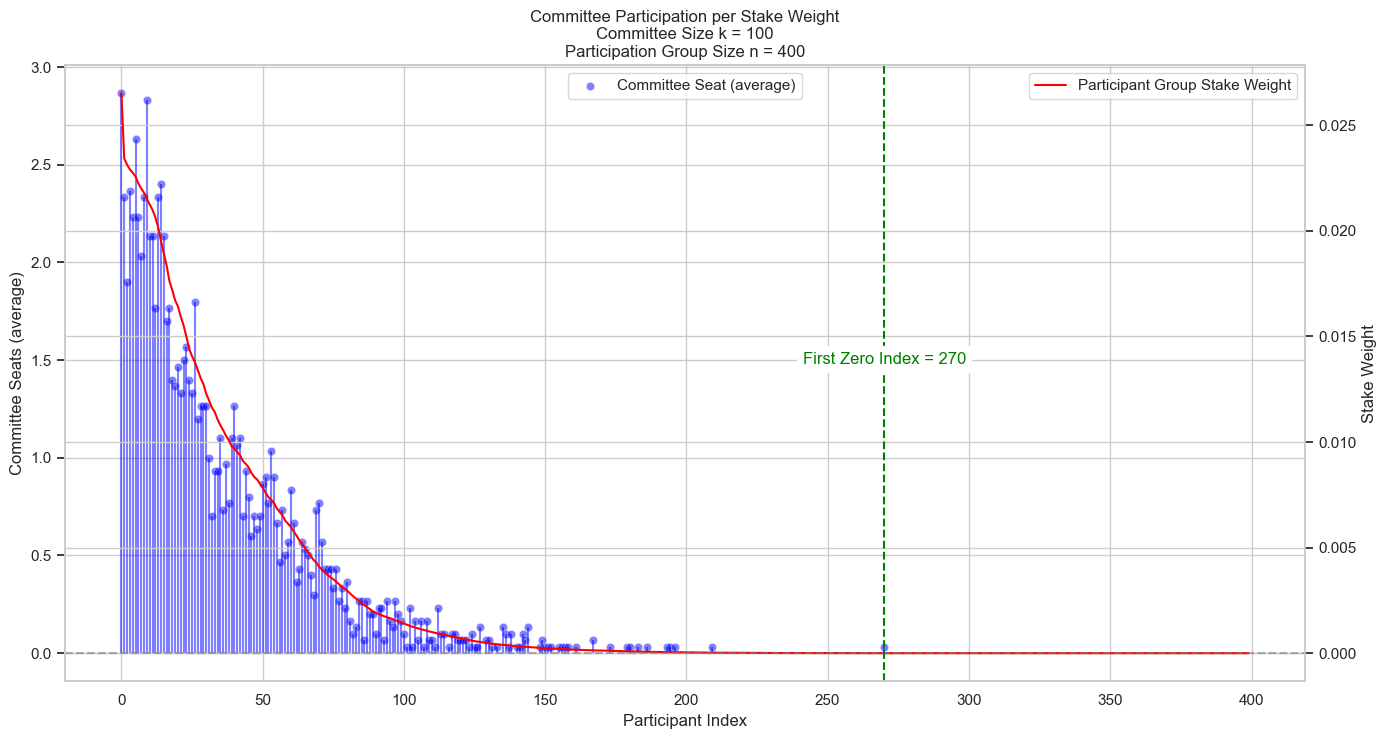

Group Size = 500


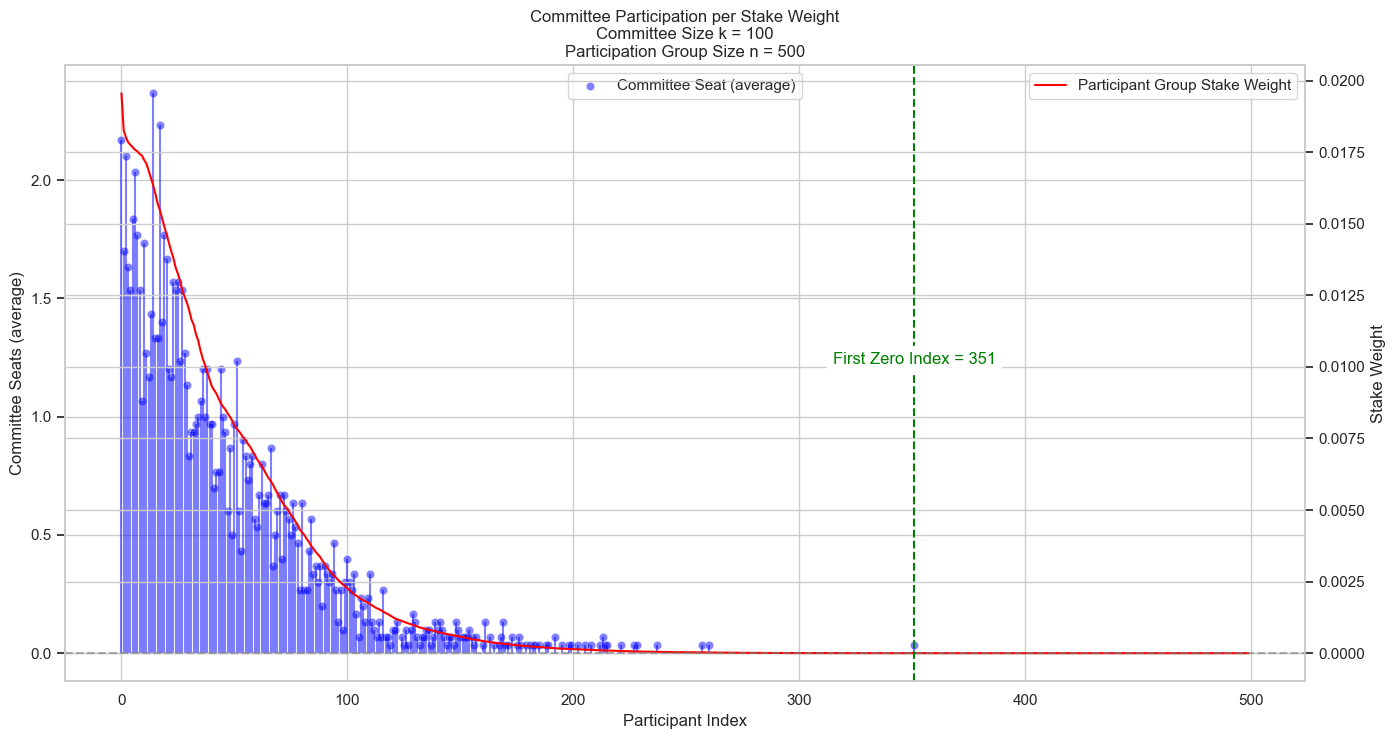


Committee Size = 200
Group Size = 100


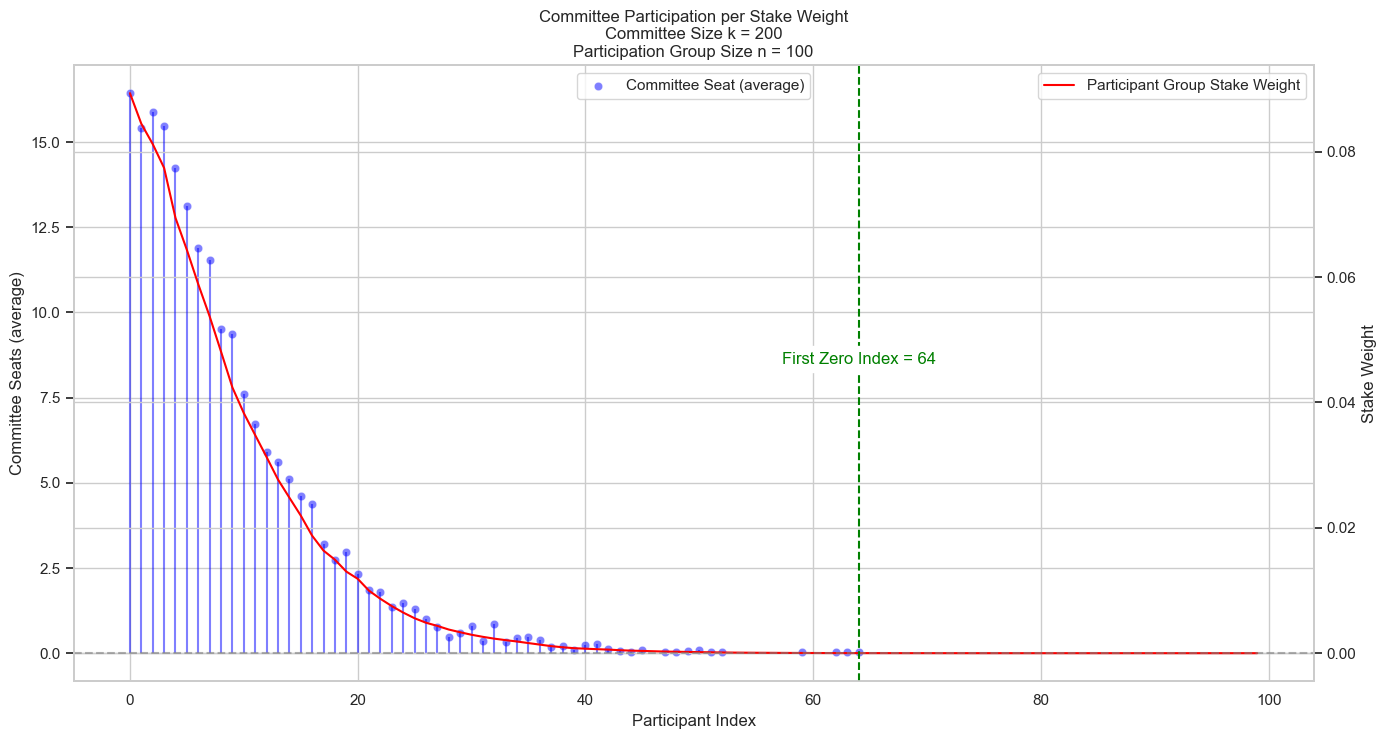

Group Size = 200


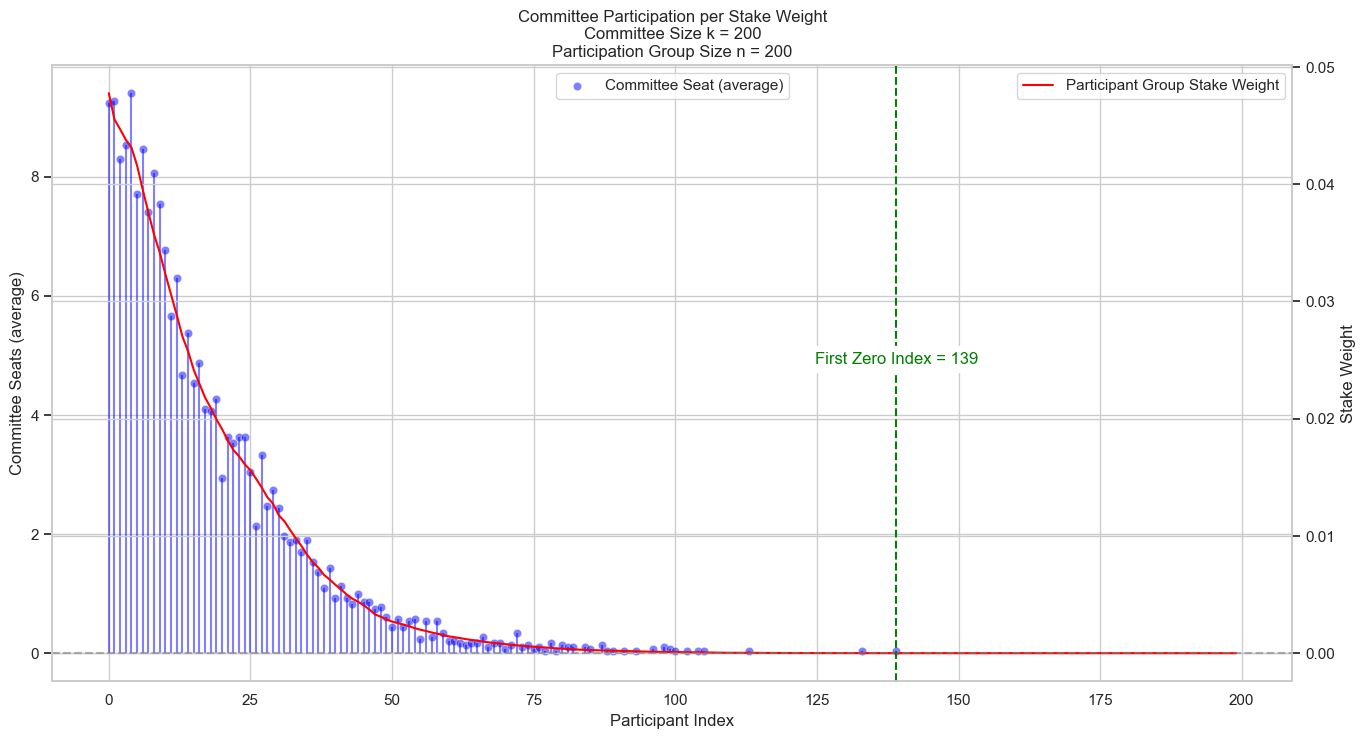

Group Size = 300


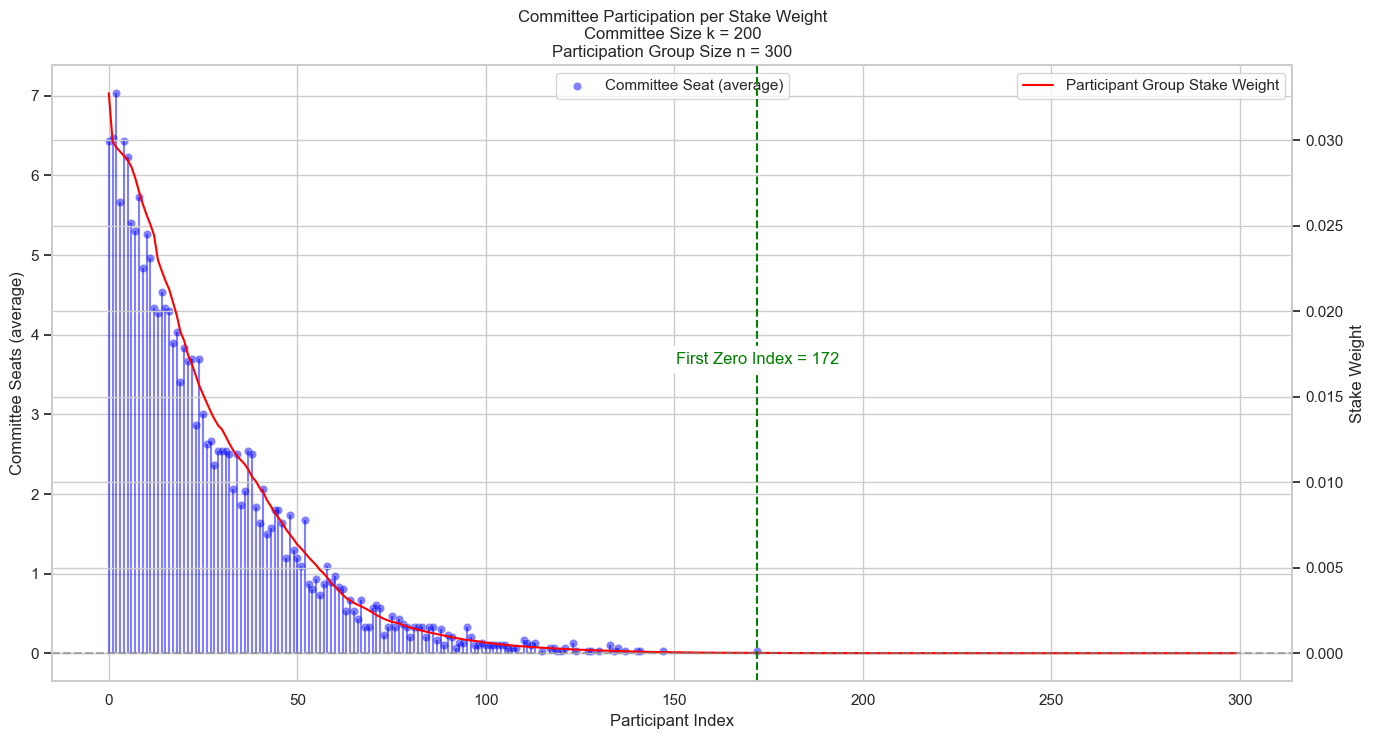

Group Size = 400


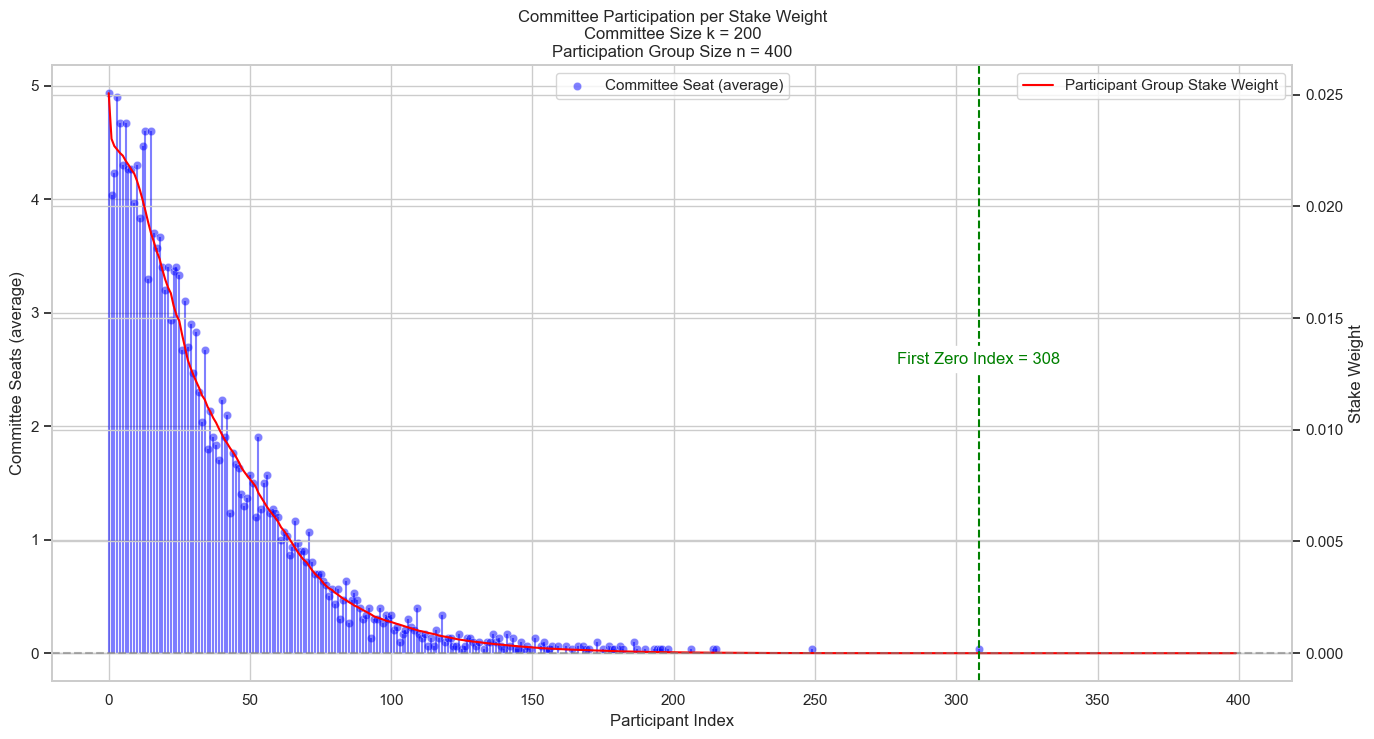

Group Size = 500


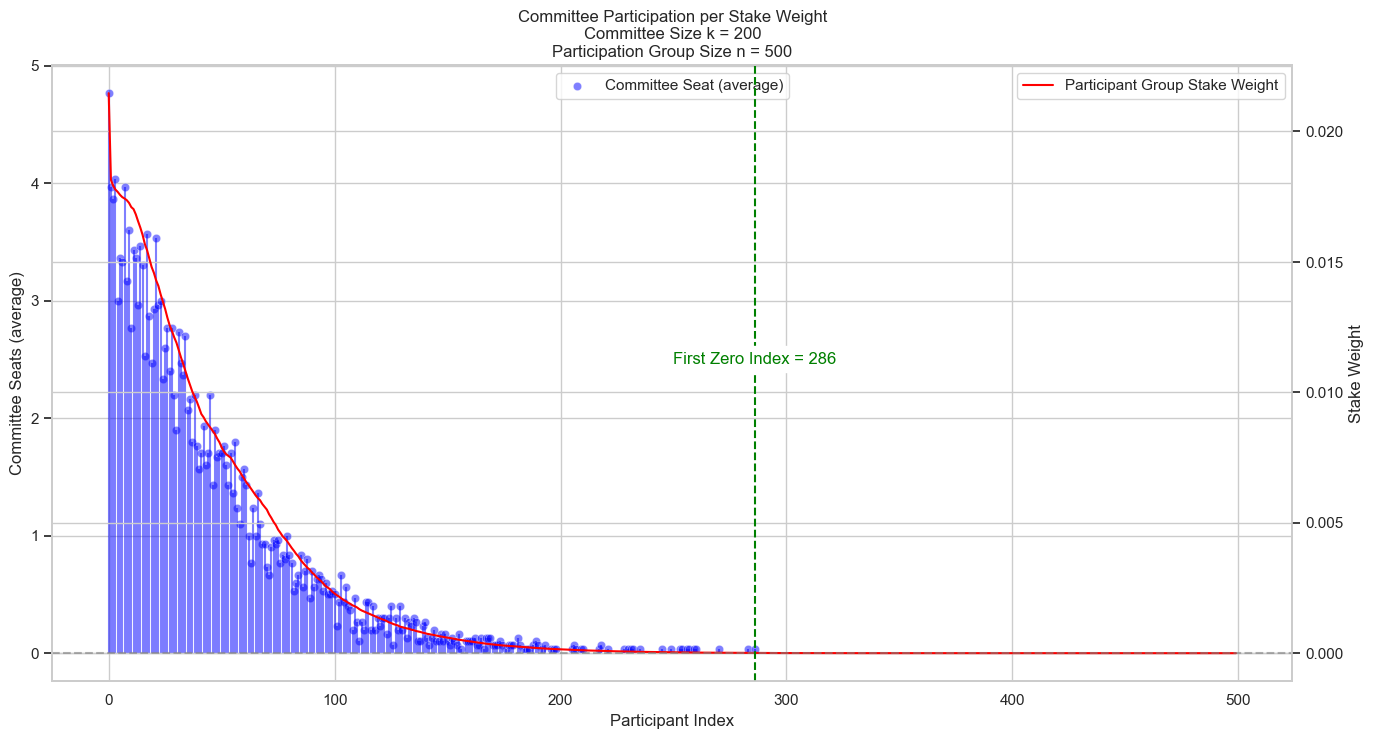


Committee Size = 300
Group Size = 100


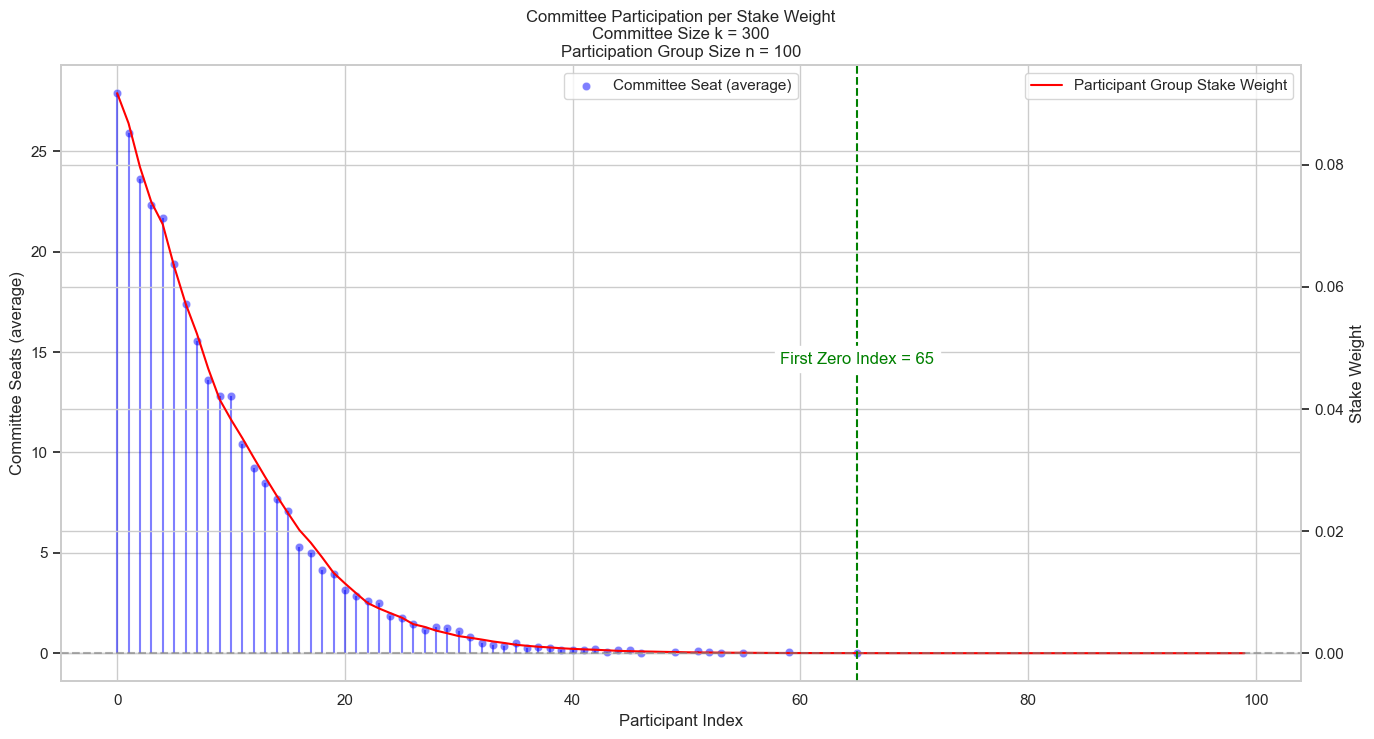

Group Size = 200


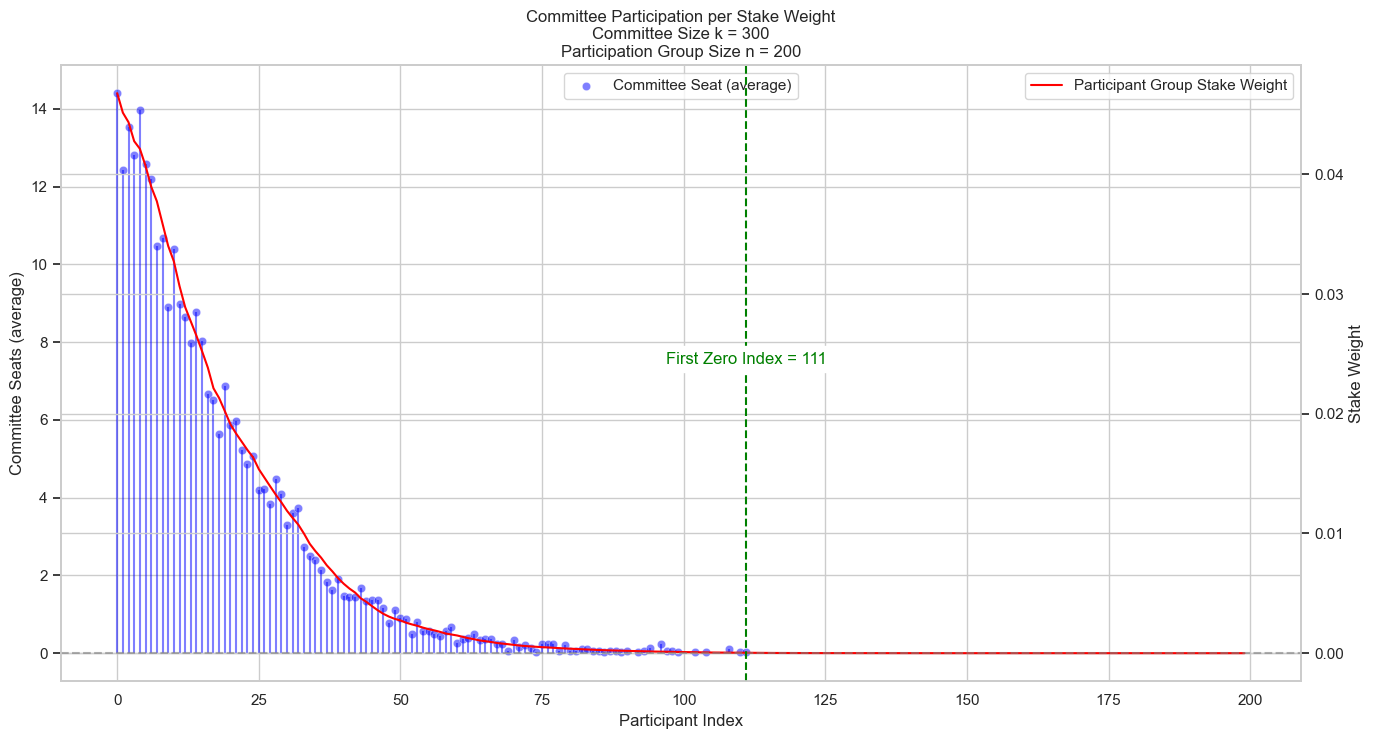

Group Size = 300


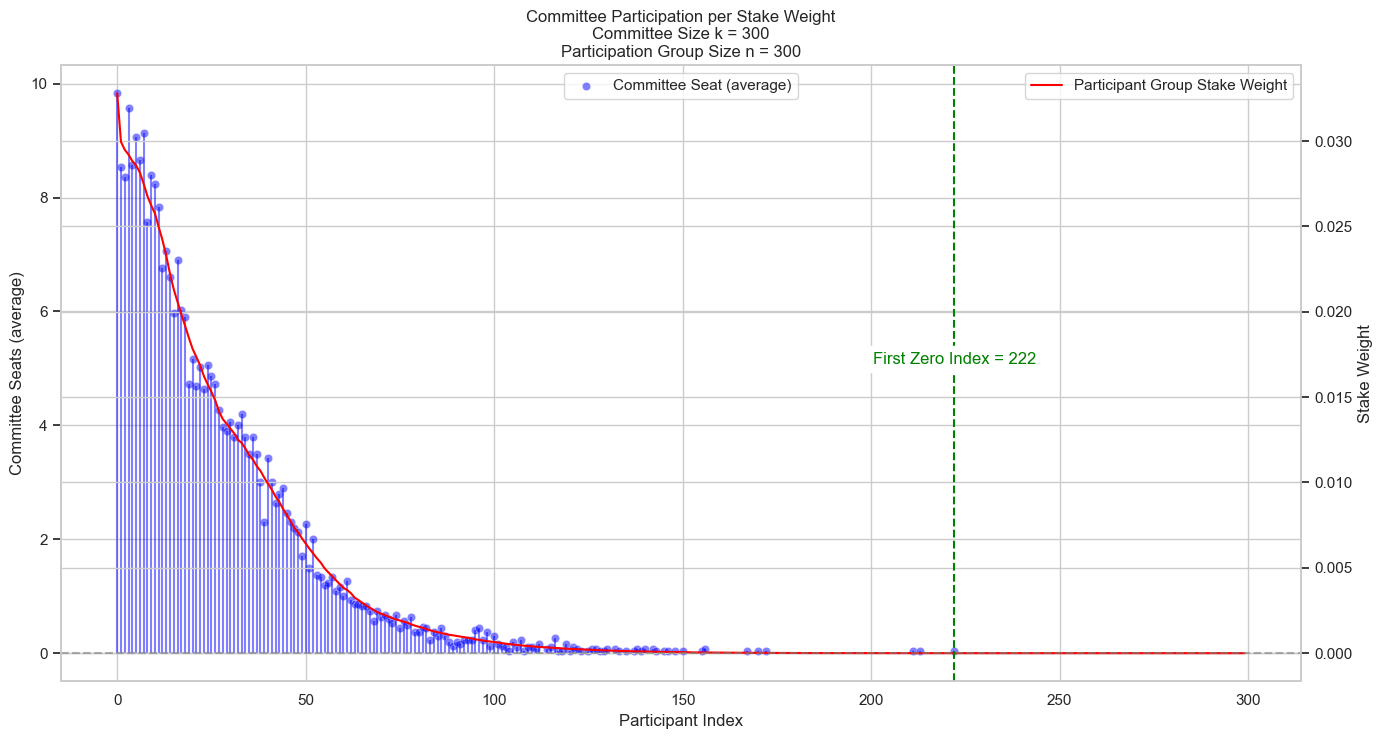

Group Size = 400


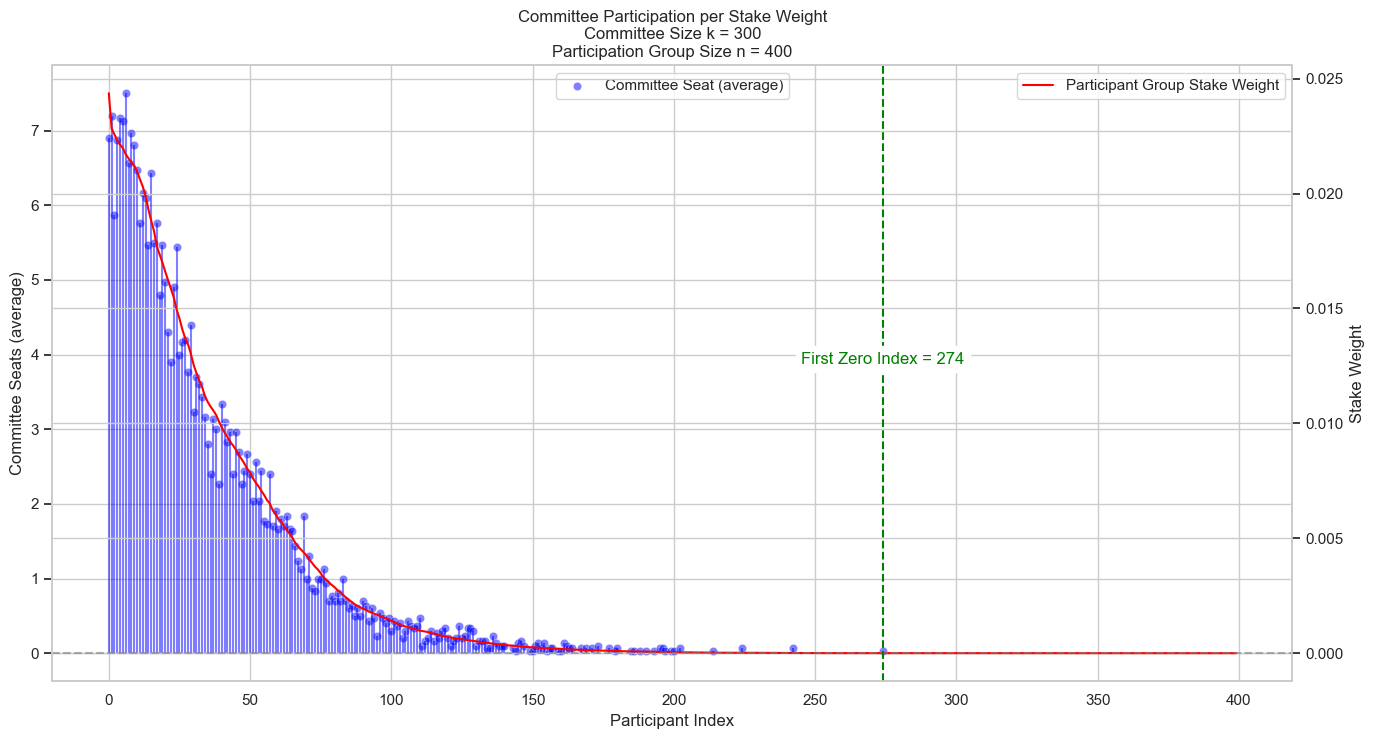

Group Size = 500


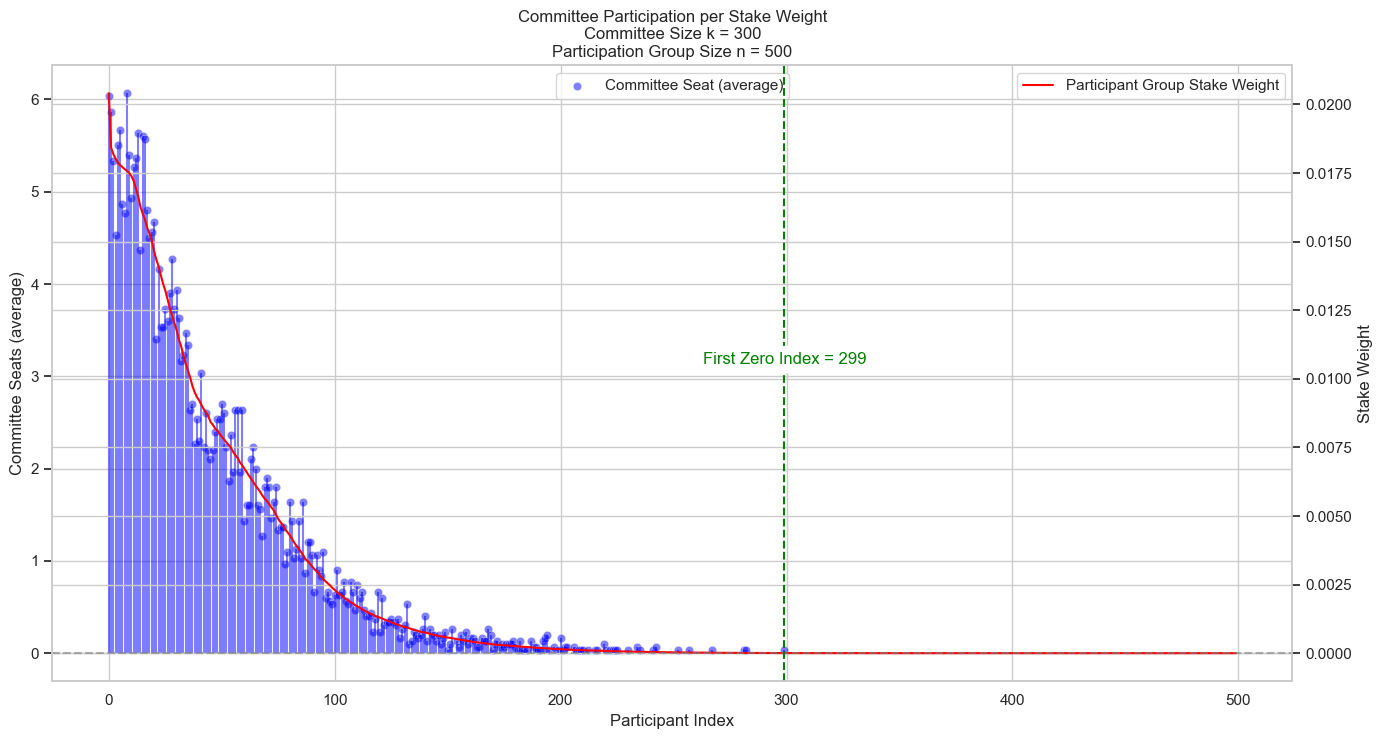


Committee Size = 400
Group Size = 100


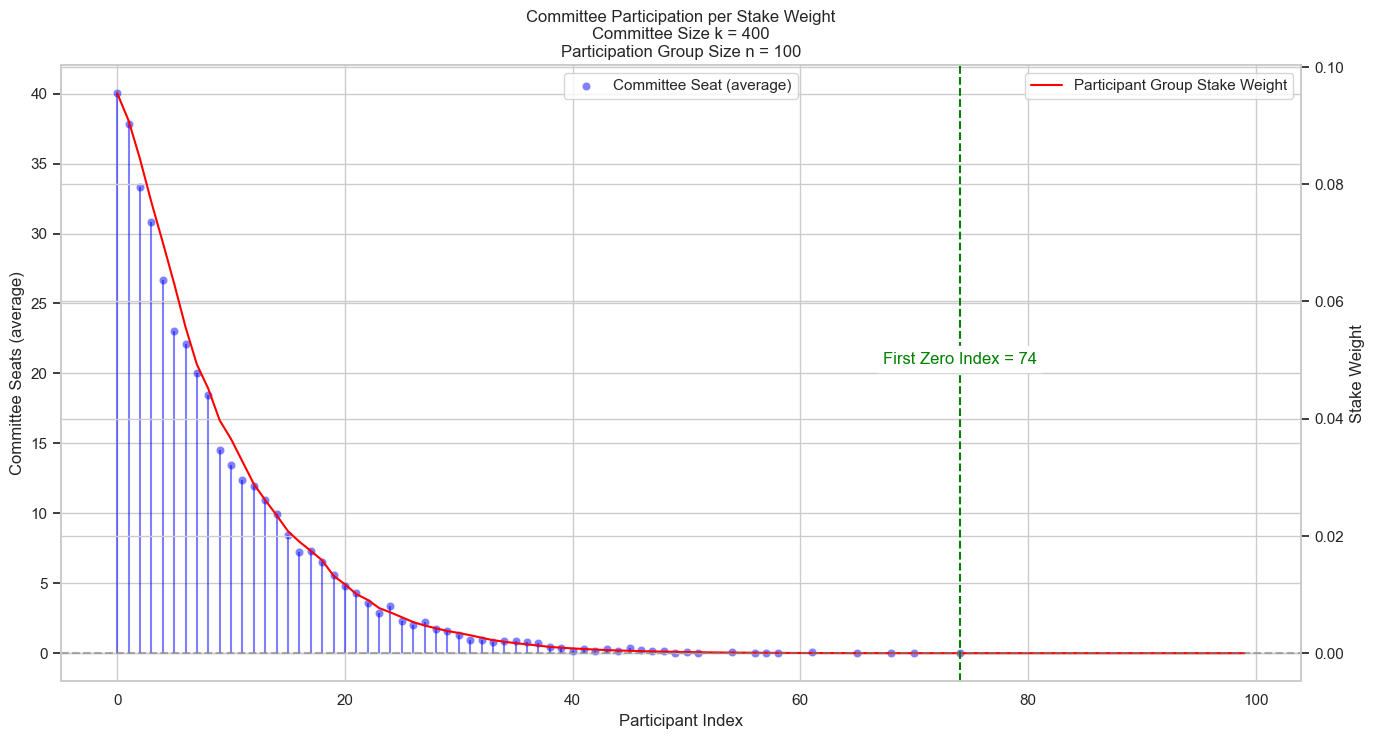

Group Size = 200


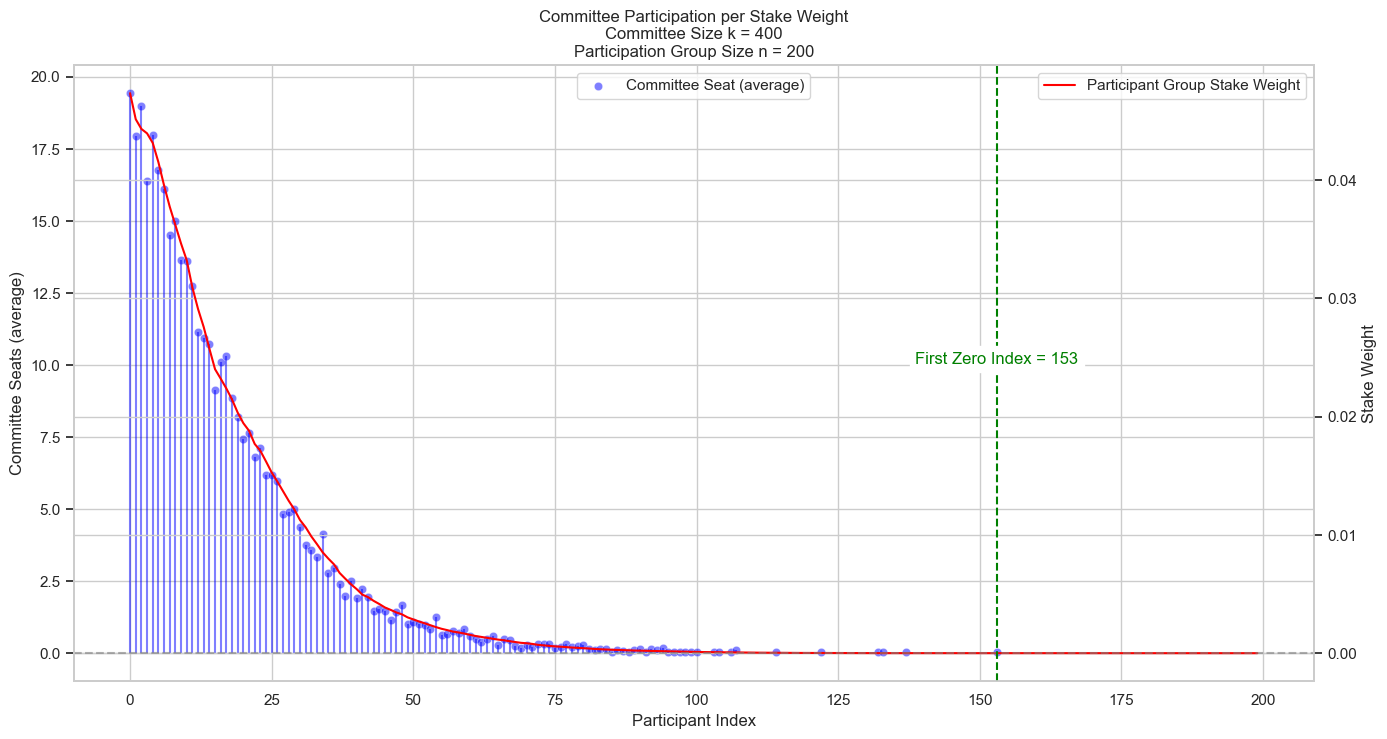

Group Size = 300


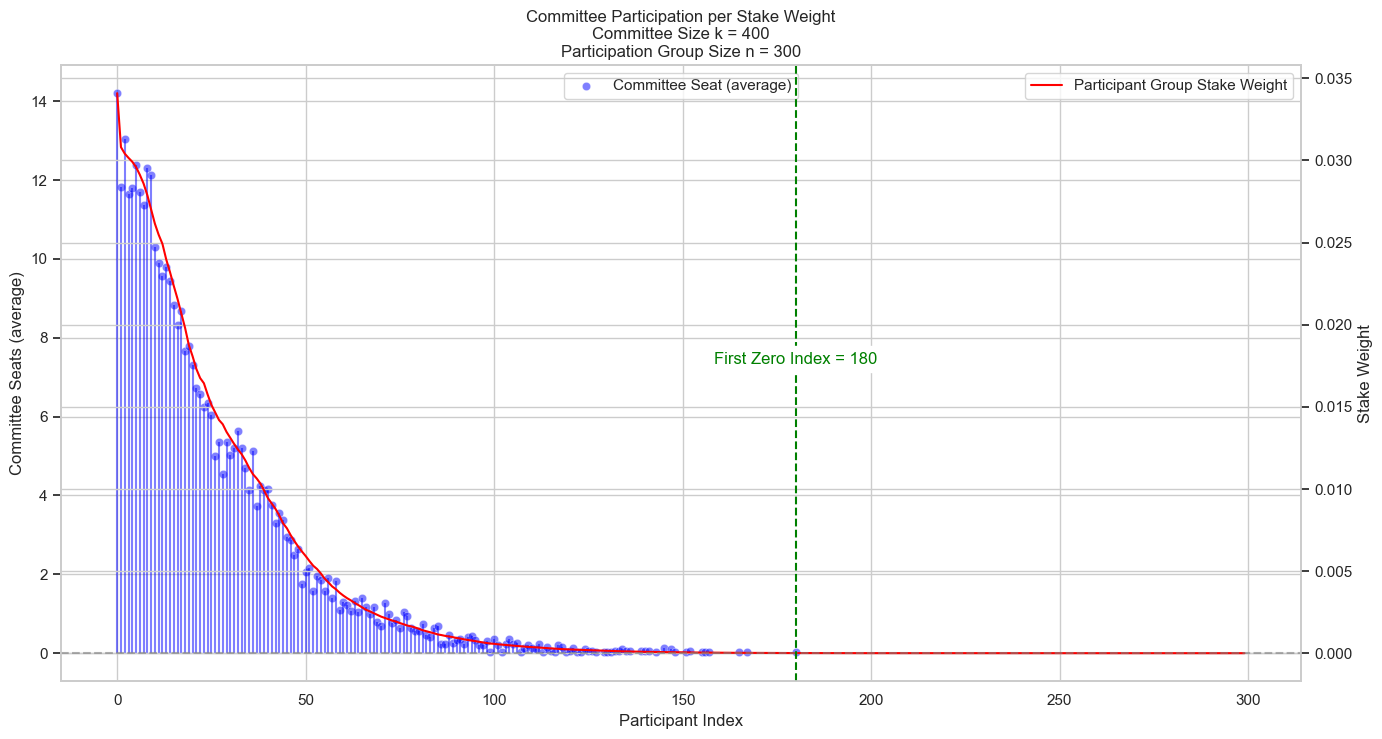

Group Size = 400


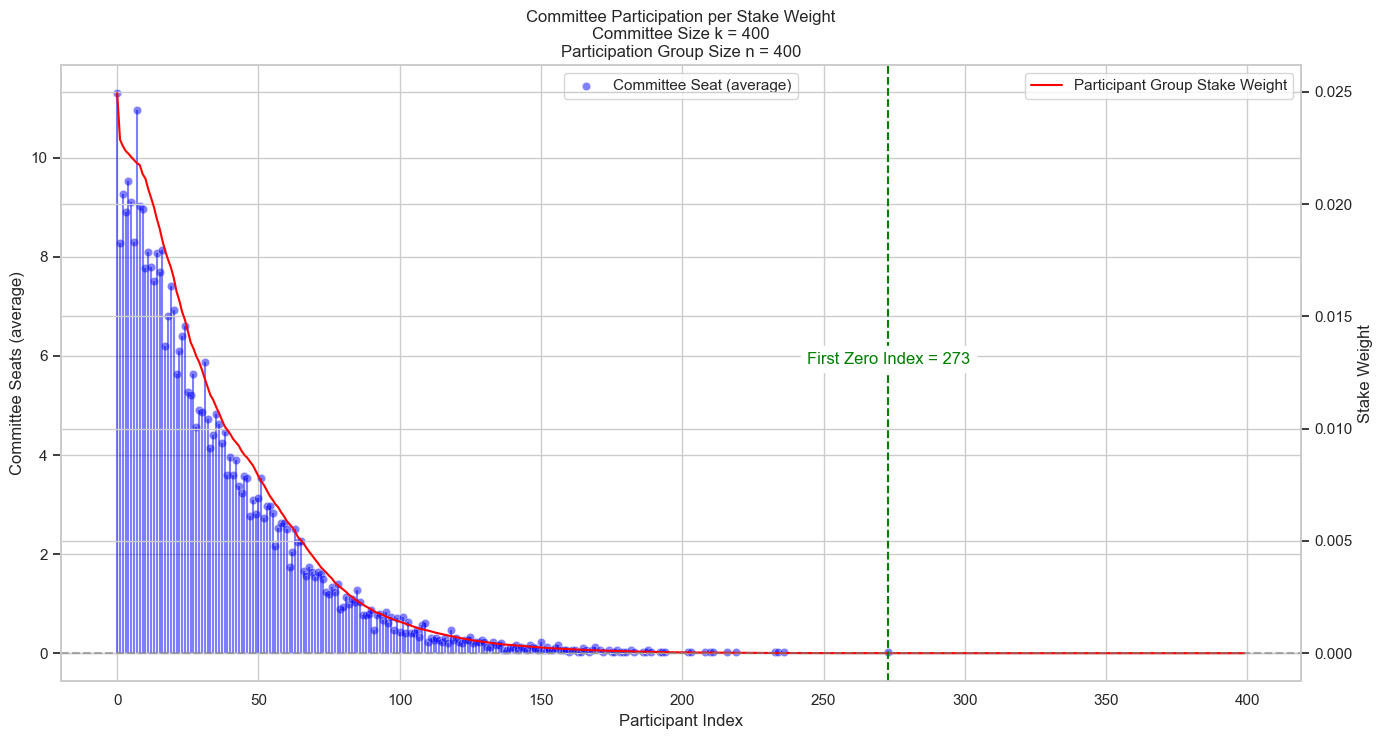

Group Size = 500


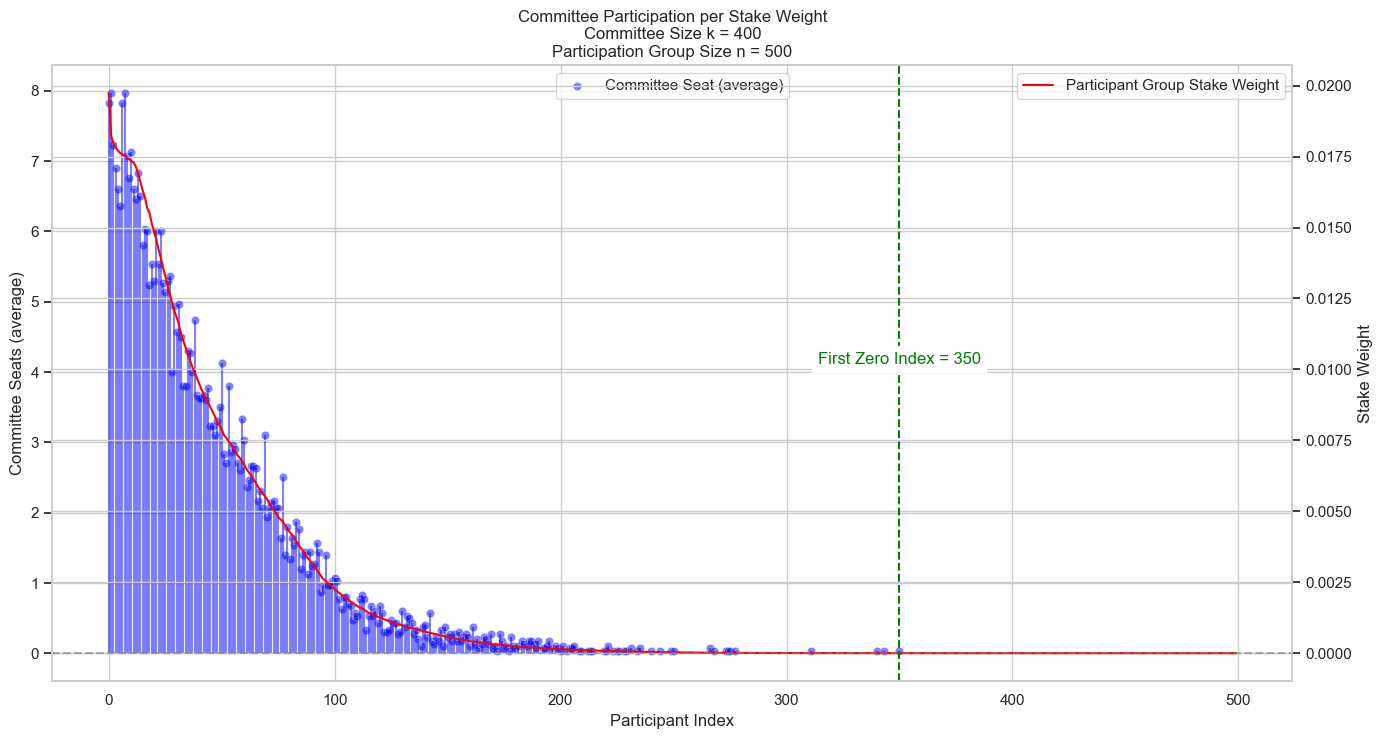


Committee Size = 500
Group Size = 100


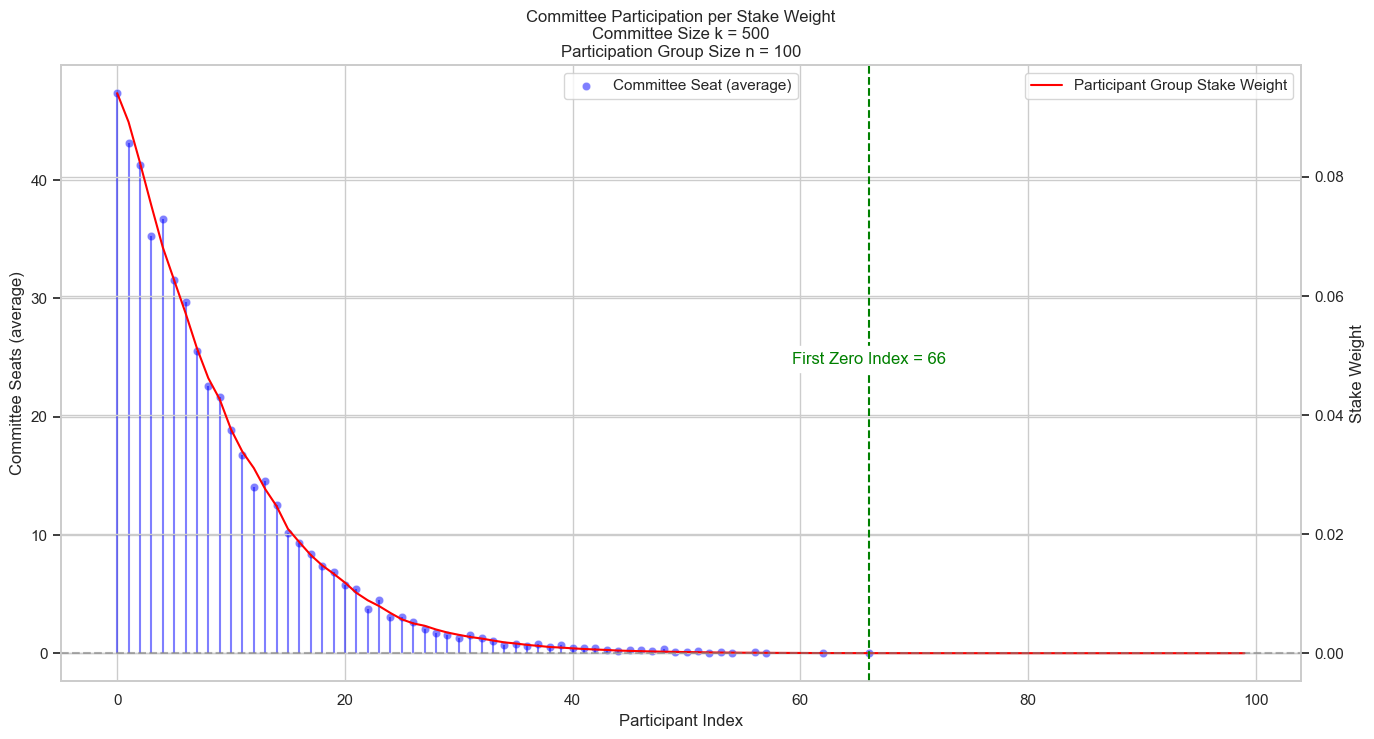

Group Size = 200


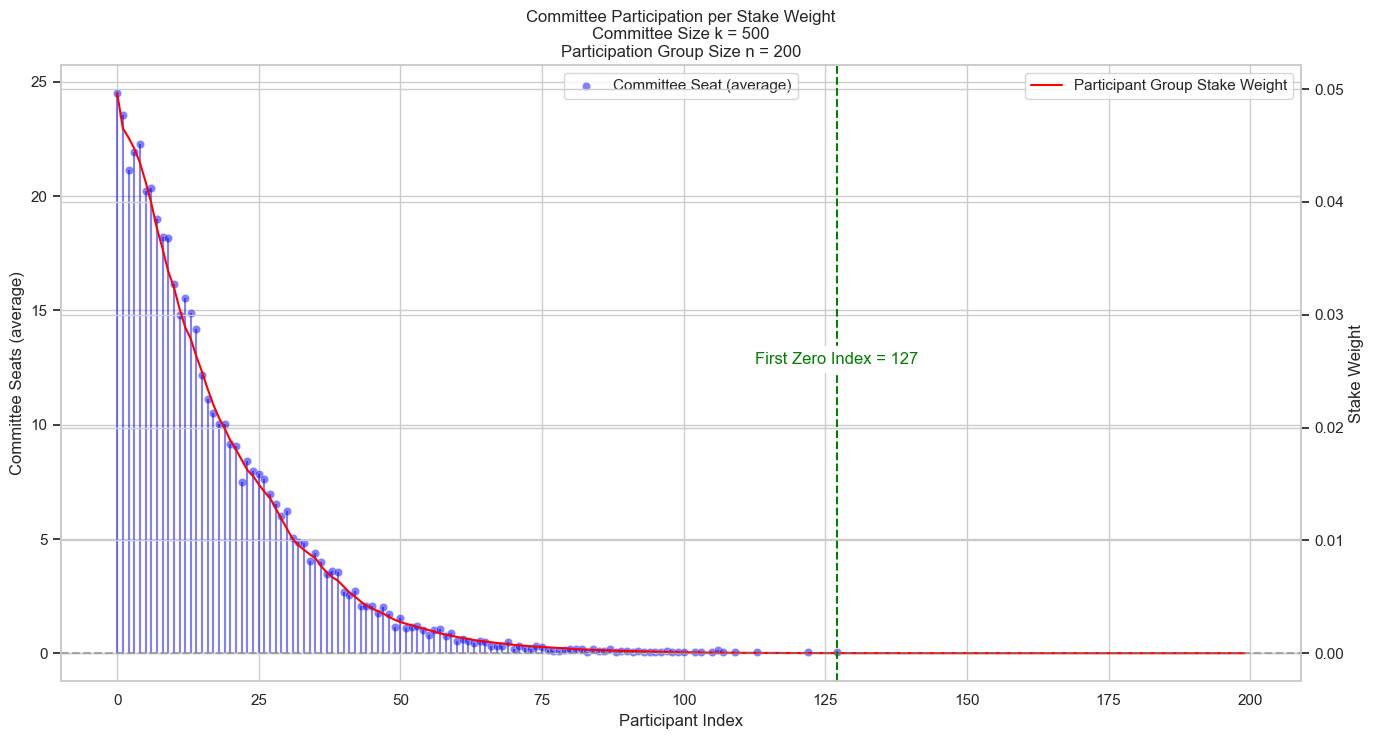

Group Size = 300


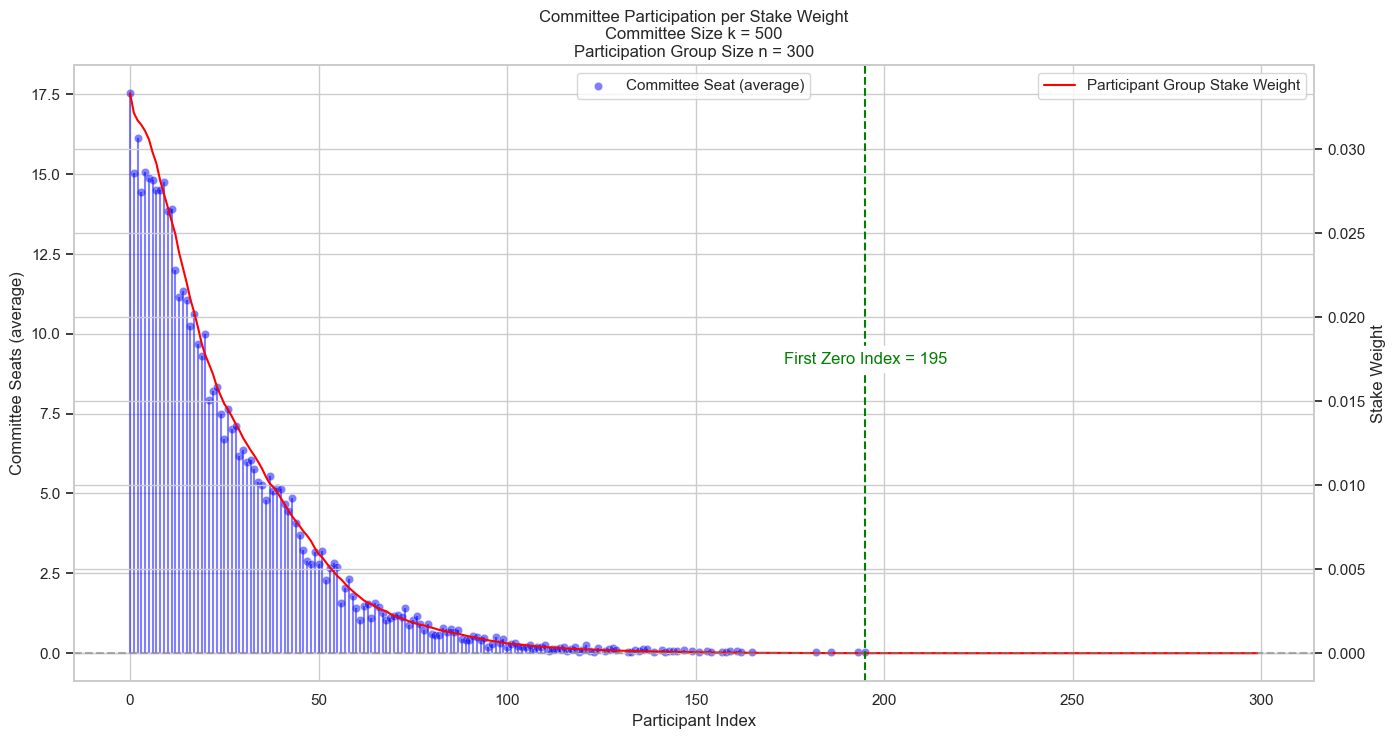

Group Size = 400


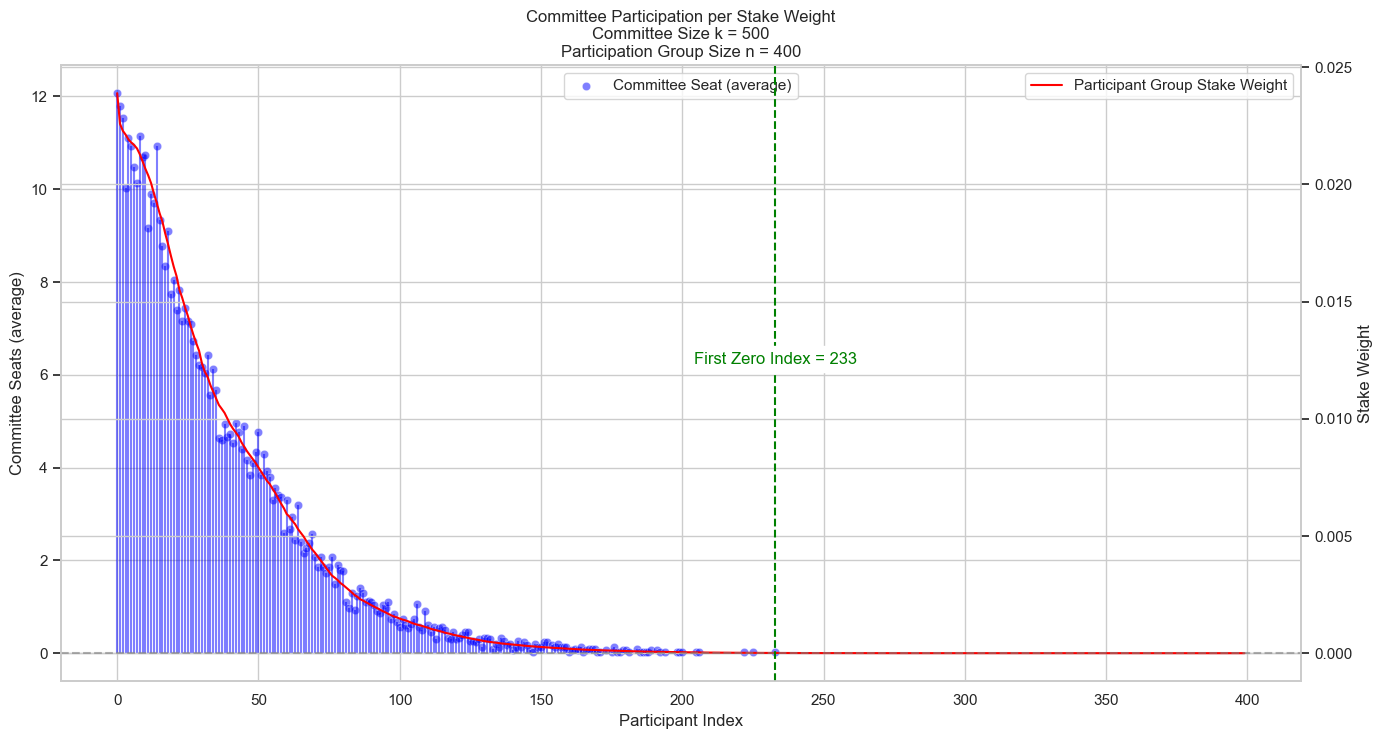

Group Size = 500


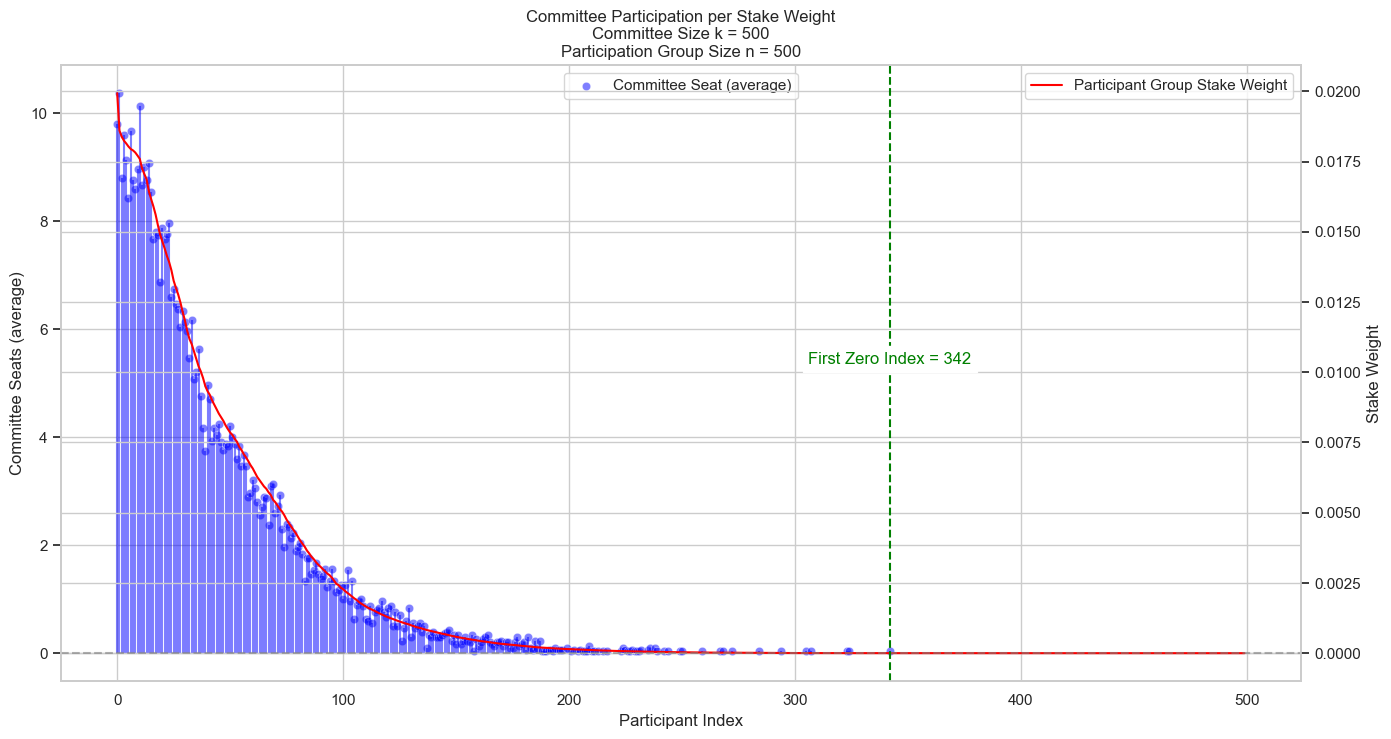

In [ ]:
# %%

# Call the function
sim_results_df = simulate(
    population,
    comm_sizes,
    group_sizes,
    num_iter,
    plot_it=True,
)

In [ ]:
# %%

# committee_seats_df = committee_seats_df.swaplevel(axis=1).sort_index(axis=1)

In [ ]:
# %%

# Extract the data for plotting

col_index = sim_results_df.columns
commitee_sizes = [
    int(col.split("=")[1].strip()) for col in col_index.get_level_values(0).unique()
]
group_sizes = [
    int(col.split("=")[1].strip()) for col in col_index.get_level_values(1).unique()
]

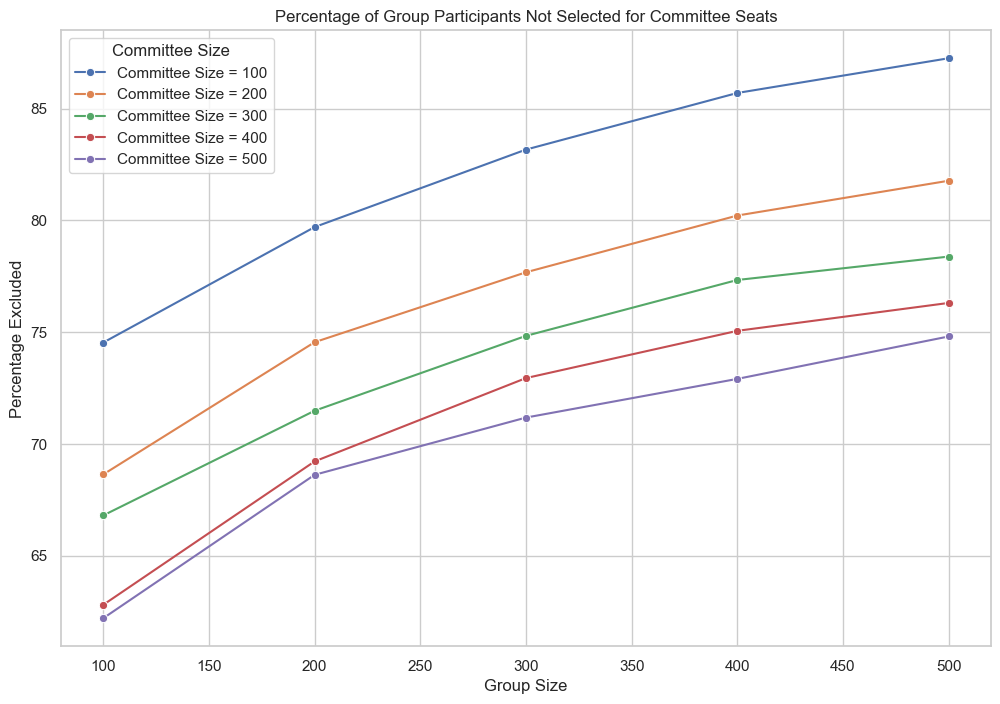

In [ ]:
# %%

# Plot the percentage of group participants excluded from a committee
# of a given size vs. different group sizes

fig, ax = plt.subplots(figsize=(12, 8))

sns.set(style="whitegrid")

for committee_size in commitee_sizes:
    committee_label = f"Committee Size = {committee_size}"
    committee_voters = sim_results_df.loc["Distinct Voters", committee_label]

    mean_values = committee_voters.loc["mean"]
    std_dev_values = committee_voters.loc["sd"]

    # Calculate the percentage of participants not selected for committee seats
    not_selected_percentages = (1.0 - mean_values / group_sizes) * 100
    not_selected_percentages.name = "Excluded (%)"

    # Create a DataFrame for easier plotting with seaborn
    plot_data = pd.DataFrame(
        {
            "Group Size": group_sizes,
            "Percentage Excluded": not_selected_percentages,
            "Std Dev": std_dev_values,
        }
    )

    # Plot the main line without error bars
    sns.lineplot(
        x="Group Size",
        y="Percentage Excluded",
        data=plot_data,
        marker="o",
        label=committee_label,
        ax=ax,
    )

ax.set_ylabel("Percentage Excluded")
ax.set_xlabel("Group Size")
ax.legend(title="Committee Size")
plt.title("Percentage of Group Participants Not Selected for Committee Seats")
plt.grid(True)
plt.show()

In [ ]:
# %%

sim_results_df.loc["Distinct Voters", :]

Committee Size Committee Size = 100                                    \
Group Size         Group Size = 100 Group Size = 200 Group Size = 300   
mean                      25.466667             40.6             50.5   
sd                         2.692376         2.332381         2.459675   

Committee Size                                   Committee Size = 200  \
Group Size     Group Size = 400 Group Size = 500     Group Size = 100   
mean                       57.2        63.733333            31.366667   
sd                     3.673327         3.604935             2.316367   

Committee Size                                                     \
Group Size     Group Size = 200 Group Size = 300 Group Size = 400   
mean                       50.9        66.966667        79.133333   
sd                     2.785079          3.25047         4.514667   

Committee Size                   ... Committee Size = 400                   \
Group Size     Group Size = 500  ...     Group Size = 100 Group Size = 200   
mean                  91.133333  ...                 37.2        61.566667   
sd                     4.709801  ...              1.83303          3.58407   

Committee Size                                                     \
Group Size     Group Size = 300 Group Size = 400 Group Size = 500   
mean                  81.166667        99.766667       118.466667   
sd                     3.387067         4.038839          4.68852   

Committee Size Committee Size = 500                                    \
Group Size         Group Size = 100 Group Size = 200 Group Size = 300   
mean                           37.8        62.766667        86.466667   
sd                         2.181742         3.018646         2.629744   

Committee Size                                    
Group Size     Group Size = 400 Group Size = 500  
mean                 108.366667       125.966667  
sd                     4.370228         5.552677  

[2 rows x 25 columns]

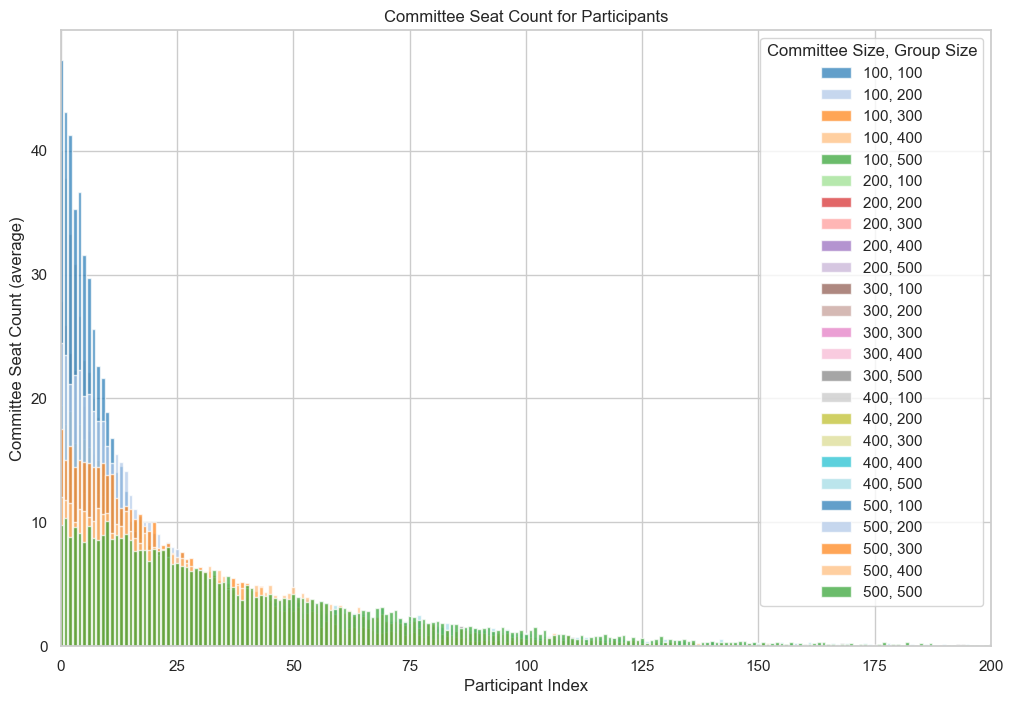

In [ ]:
# %%

# Plot the committee selection counts distribution
fig = plt.figure(figsize=(12, 8))

plot_data = sim_results_df.loc["Committee Seats"].loc["mean"]

for c, g in plot_data.index:

    y = plot_data.loc[(c, g)]
    x = y.index

    n_c = int(c.split("=")[1].strip())
    n_g = int(g.split("=")[1].strip())

    colors = sns.color_palette("tab20", len(plot_data.index))
    color_idx = list(plot_data.index).index((c, g))
    plt.bar(x, y, alpha=0.7, color=colors[color_idx], label=f"{n_c}, {n_g}")

plt.xlabel("Participant Index")
plt.ylabel("Committee Seat Count (average)")
plt.title("Committee Seat Count for Participants")
plt.legend(title="Committee Size, Group Size")
plt.xlim(0, 200)
plt.show()

In [ ]:
# %%

# Distinct Voters
committee_voters = sim_results_df.loc["Distinct Voters"]

# Create a DataFrame row from the computed percentages
mean_values = committee_voters.loc["mean"]
std_dev_values = committee_voters.loc["sd"]

# Calculate the percentage of participants not selected for committee seats
print("Percentage of Group Participants Not Selected for Committee Seats:")
committee_participation = pd.concat([mean_values, std_dev_values], axis=1)
# committee_participation.columns = ["Mean", "Std Dev"]

print(committee_participation)

Percentage of Group Participants Not Selected for Committee Seats:
                                             mean        sd
Committee Size       Group Size                            
Committee Size = 100 Group Size = 100   25.466667  2.692376
                     Group Size = 200        40.6  2.332381
                     Group Size = 300        50.5  2.459675
                     Group Size = 400        57.2  3.673327
                     Group Size = 500   63.733333  3.604935
Committee Size = 200 Group Size = 100   31.366667  2.316367
                     Group Size = 200        50.9  2.785079
                     Group Size = 300   66.966667   3.25047
                     Group Size = 400   79.133333  4.514667
                     Group Size = 500   91.133333  4.709801
Committee Size = 300 Group Size = 100        33.2  2.181742
                     Group Size = 200   57.033333   3.25047
                     Group Size = 300        75.5  3.442383
                     Group Size =

In [ ]:
# %%

# Prepare the DataFrame for concatenation with the other simulation results
committee_participation = committee_participation.T
committee_participation.index = pd.MultiIndex.from_tuples(
    [("Committee Participation %", "mean"), ("Committee Participation %", "sd")]
)

# Concatenate this new row to the simulation results DataFrame
sim_results_df = pd.concat([sim_results_df, committee_participation], axis=0)

sim_results_df

Committee Size                                               Committee Size = 100  \
Group Size                                                       Group Size = 100   
Distinct Voters           mean                                          25.466667   
                          sd                                             2.692376   
Committee Seats           mean  0     8.600000
1     9.900000
2     8.900000
3...   
Committee Participation % mean                                          25.466667   
                          sd                                             2.692376   

Committee Size                                                                     \
Group Size                                                       Group Size = 200   
Distinct Voters           mean                                               40.6   
                          sd                                             2.332381   
Committee Seats           mean  0      4.666667
1      4.266667
2      4.33333...   
Committee Participation % mean                                               40.6   
                          sd                                             2.332381   

Committee Size                                                                     \
Group Size                                                       Group Size = 300   
Distinct Voters           mean                                               50.5   
                          sd                                             2.459675   
Committee Seats           mean  0      3.000000
1      2.800000
2      2.96666...   
Committee Participation % mean                                               50.5   
                          sd                                             2.459675   

Committee Size                                                                     \
Group Size                                                       Group Size = 400   
Distinct Voters           mean                                               57.2   
                          sd                                             3.673327   
Committee Seats           mean  0      2.866667
1      2.333333
2      1.90000...   
Committee Participation % mean                                               57.2   
                          sd                                             3.673327   

Committee Size                                                                     \
Group Size                                                       Group Size = 500   
Distinct Voters           mean                                          63.733333   
                          sd                                             3.604935   
Committee Seats           mean  0      2.166667
1      1.700000
2      2.10000...   
Committee Participation % mean                                          63.733333   
                          sd                                             3.604935   

Committee Size                                               Committee Size = 200  \
Group Size                                                       Group Size = 100   
Distinct Voters           mean                                          31.366667   
                          sd                                             2.316367   
Committee Seats           mean  0     16.433333
1     15.400000
2     15.86666...   
Committee Participation % mean                                          31.366667   
                          sd                                             2.316367   

Committee Size                                                                     \
Group Size                                                       Group Size = 200   
Distinct Voters           mean                                               50.9   
                          sd                                             2.785079   
Committee Seats           mean  0      9.233333
1      9.266667
2      8.30000...   

In [ ]:
# %%

# Save the results to an Excel file
output_file = "../data/participation_run_results.xlsx"
sim_results_df.to_excel(output_file)
print(f"Results saved to {output_file}")

Results saved to ../data/participation_run_results.xlsx
